##**Évaluation et analyse des obligations dans R**
+ *4 heures*
+ *13 Vidéos*
+ *43 Exercices*
+ *12 303 participants*
+ *3 350 XP*

###**Description du cours**

+ ***Après ce cours sur la finance quantitative avec R, vous serez en mesure d'utiliser R pour développer un modèle pour évaluer une obligation à taux d'intérêt fixe, estimer et analyser le rendement d'une obligation (c'est-à-dire une mesure du coût d'opportunité des investisseurs obligataires ), et les techniques de modélisation utilisées pour protéger les portefeuilles obligataires des variations des taux d'intérêt.***

+ ***Pourquoi valoriser les obligations ?***
+ ***Les obligations sont des titres émis par des gouvernements ou des sociétés qui versent des intérêts selon un calendrier fixe et sont le type le plus connu de titres à revenu fixe. Le marché américain des titres à revenu fixe est 1,5 fois plus grand que le marché boursier américain, mais, contrairement aux actions, la plupart des instruments à revenu fixe, y compris les obligations, se négocient très rarement. Par conséquent, le prix d'une obligation peut être un indicateur moins fiable de sa valeur et des techniques analytiques sont nécessaires lors de l'analyse et de l'évaluation des obligations.***

####**1) Introduction et évaluation des obligations Vanilla**

+ ***Le marché des titres à revenu fixe est vaste et regorge d'instruments complexes. Dans ce cours, nous nous concentrons sur les obligations vanilles simples pour construire des fondamentaux solides dont vous aurez besoin pour vous attaquer à des instruments à revenu fixe plus complexes. Dans ce chapitre, nous démontrons les mécanismes de valorisation des obligations en nous concentrant sur un coupon annuel, un taux fixe, une échéance fixe et une obligation sans option.***

|OBJECTIFS|
|------------------|
Introduction
Prix vs valeur
La valeur temporelle de l'argent
Calcul de la valeur future d'une obligation
Calcul de la valeur actuelle d'une obligation
Valorisation des obligations
Présentation des flux de trésorerie de l'obligation
Actualisation des flux de trésorerie obligataires à rendement connu
Transformez votre code en fonction
Convertissez votre code en une fonction d'évaluation des obligations

####**2) Rendement à l'échéance**

+ ***Estimation du rendement à l'échéance - Le YTM mesure le rendement attendu des investisseurs obligataires s'ils détiennent l'obligation jusqu'à l'échéance. Ce nombre résume la rémunération exigée par les investisseurs pour le risque qu'ils supportent en investissant dans une obligation particulière. Nous verrons comment estimer le YTM d'une obligation.***

|OBJECTIFS|
|------------------|
Relation prix-rendement
Cotes de crédit
Le rendement de l'indice Moody's Baa
Évaluez l'obligation à 5 % en utilisant le rendement Baa que vous avez trouvé
Tracé de la relation prix/rendement
Composantes du rendement
Rendement sans risque
Tracer les rendements du Trésor américain
Tracé de l'écart de qualité d'investissement
Estimer le rendement d'une obligation
Trouver le rendement d'une obligation
Utilisez la fonction uniroot pour trouver YTM

####**3) Durée et convexité**

+ ***Le risque de taux d'intérêt est le plus grand risque auquel sont confrontés les investisseurs obligataires. Lorsque les taux d'intérêt augmentent, les prix des obligations baissent. Pour cette raison, une grande attention est accordée à la sensibilité du prix d'une obligation particulière aux variations des taux d'intérêt. Dans ce chapitre, nous commençons la discussion avec une mesure simple de la volatilité du prix des obligations - la valeur du prix d'un point de base. Ensuite, nous discutons de la durée et de la convexité, qui sont deux mesures courantes utilisées pour gérer le risque de taux d'intérêt.***

|OBJECTIFS|
|------------------|
Volatilité du prix des obligations et valeur du prix d'un point de base
Valeur du prix d'un point de base
Calculer PV01 d'une obligation à 10 %
Durée
Durée d'une obligation à coupon zéro
Calculer la durée approximative d'une obligation
Estimation de l'effet sur le prix des obligations en utilisant la durée
Convexité
Calculer la convexité approximative d'une obligation
Estimation de l'effet de la convexité sur le prix des obligations
Estimation du prix des obligations à l'aide de la durée et de la convexité

####**4) Exemple complet**

+ ***Nous mettrons toutes les techniques que l'étudiant a apprises des chapitres un à trois dans un exemple complet. L'étudiant sera invité à évaluer une obligation en utilisant le rendement d'une obligation comparable et à estimer la durée et la convexité de l'obligation.***

|OBJECTIFS|
|------------------|
Résumé des principaux enseignements
Trouvez les rendements des obligations AAA au 30 septembre 2016
Valorisation des obligations
Code vectoriel de flux de trésorerie alternatif
Durée et convexité
Sens du changement de prix
Calculer la durée
Calculer la mesure de convexité
La variation de prix estimée en utilisant la durée et la convexité

In [ ]:
install.packages("Quandl")
install.packages('quantmod')
install.packages('tidyr')
install.packages('dplyr')

In [ ]:
library(Quandl)
library(quantmod)
library(tidyr)
library(dplyr)

###**Introduction**

####**1. Introduction**
+ ***Bienvenue à ce cours sur l’évaluation et l’analyse des obligations à l’aide de R!****

####**2. À propos de moi**
+ ***Je suis vice-président chez Compass Lexecon, une société de conseil économique. Je conseille les clients sur une variété de questions financières, telles que l’évaluation et le financement des entreprises. Je suis également l’auteur de Analyzing Financial Data and Implementing Financial Models Using R. Mon livre sert de référence et j’encourage tout le monde à le consulter pour obtenir du matériel supplémentaire.***

####**3. Obligations**
+ Dans ce cours, nous nous concentrons sur le plus simple mais le plus commun du groupe d’instruments à revenu fixe - une obligation. 

+ **Une obligation est un titre de créance qui oblige l’émetteur à rembourser au prêteur le montant qu’il emprunte plus les intérêts sur une période donnée.**

+ **L’utilisation d’obligations nous permet d’apprendre les concepts fondamentaux de l’évaluation et de l’analyse des obligations sans les complications inutiles qui surviennent lors de l’utilisation de titres à revenu fixe plus complexes.**

####**4. Caractéristiques d’une obligation**

+ Chaque lien a quelques caractéristiques de base qui le définissent. 
+ Nous décrivons maintenant certaines de ces caractéristiques principales. 
+ Chaque obligation a un émetteur. C’est l’entité qui emprunte l’argent. 
+ Quelques exemples sont les sociétés, les gouvernements ou les municipalités. 
+ **Le montant emprunté est appelé le principal**. 
+ **Le capital est également appelé la valeur nominale ou la valeur nominale de l’obligation**. 
+ Le montant des intérêts payés est indiqué par le taux du coupon. 
+ Les tarifs des coupons peuvent être payés à différentes fréquences, telles que annuellement, semestriellement ou trimestriellement. 
+ Les coupons peuvent être fixés pour la durée de vie de l’obligation ou ils peuvent être flottants, ce qui signifie qu’ils changent à chaque période de paiement.

####**5. Caractéristiques d’une obligation**
+ La plupart des obligations ont une date d’échéance. 
+ C’est à ce moment que l’obligation cesse de devenir en circulation et que le principal est remboursé. 
+ Cependant, certaines obligations n’arrivent pas à échéance. 
+ Les obligations de consolation émises par le gouvernement britannique en sont un exemple. 
+ Enfin, certaines obligations ont également des options intégrées. 
+ Ce sont des caractéristiques qui modifient le profil de flux de trésorerie d’une obligation, comme la réduction de l’échéance de l’obligation. 
+ Un exemple de ceci est une obligation appelable, où l’émetteur peut racheter l’obligation à l’investisseur avant la date d’échéance initiale. 
+ Les obligations avec des options intégrées nécessitent généralement des analyses plus complexes et dépassent le cadre de ce cours.

####**6. Obligations dans ce cours**
+ Pour nous concentrer sur les concepts fondamentaux de l’évaluation et de l’analyse des obligations, nous effectuerons une analyse sur une obligation simple, mais réaliste pendant toute la durée de ce cours. 
+ Nous utiliserons des obligations qui paient des coupons annuels fixes. 
+ Notre obligation aura également une échéance fixe sans options intégrées.

####**7. Prix vs valeur**
+ Dans ce cours, nous utiliserons les termes « prix de l’obligation » et « valeur de l’obligation » de manière interchangeable. 
+ Cependant, vous devez savoir qu’il existe une différence entre ces deux termes. 
+ Le prix d’une obligation est le montant que vous payez pour acheter l’obligation. 
+ La valeur d’une obligation est ce que vous pensez qu’elle vaut. 
+ Pourquoi est-ce important?
  +  Supposons qu’un acheteur croit qu’une obligation vaut 105 $, 
  
  + alors qu’un vendeur croit que la même obligation vaut 95 $. 
  
+ Les deux peuvent se négocier lorsque le prix de l’obligation est de 100 $. 

+ C’est parce que 
  + l’acheteur paiera 100 $ 
  
  + pour quelque chose qu’il pense valoir 105 $ 
  
  + et le vendeur acceptera les 100 $ parce qu’il pense que le cautionnement ne vaut que 
  
  + 95 $. Comme le montre cet exemple, la valeur d’une obligation est différente pour différents vendeurs et acheteurs. 
  
+ Mais, si l’obligation se négocie fréquemment, le prix de l’obligation pourrait être considéré comme un prix moyen qui élimine les différences d’évaluation spécifiques à l’acheteur et au vendeur. 

+ Ainsi, pour les obligations activement négociées, le prix peut être considéré comme la meilleure estimation de la valeur de l’obligation. 
+ Cependant, étant donné que de nombreuses obligations sont rarement négociées, les chances sont contre vous de trouver de telles obligations.

####**8. Entraînons-nous!**
+ Ok, c’était beaucoup de matériel! Maintenant, entraînons-nous!

###**EXERCICES**

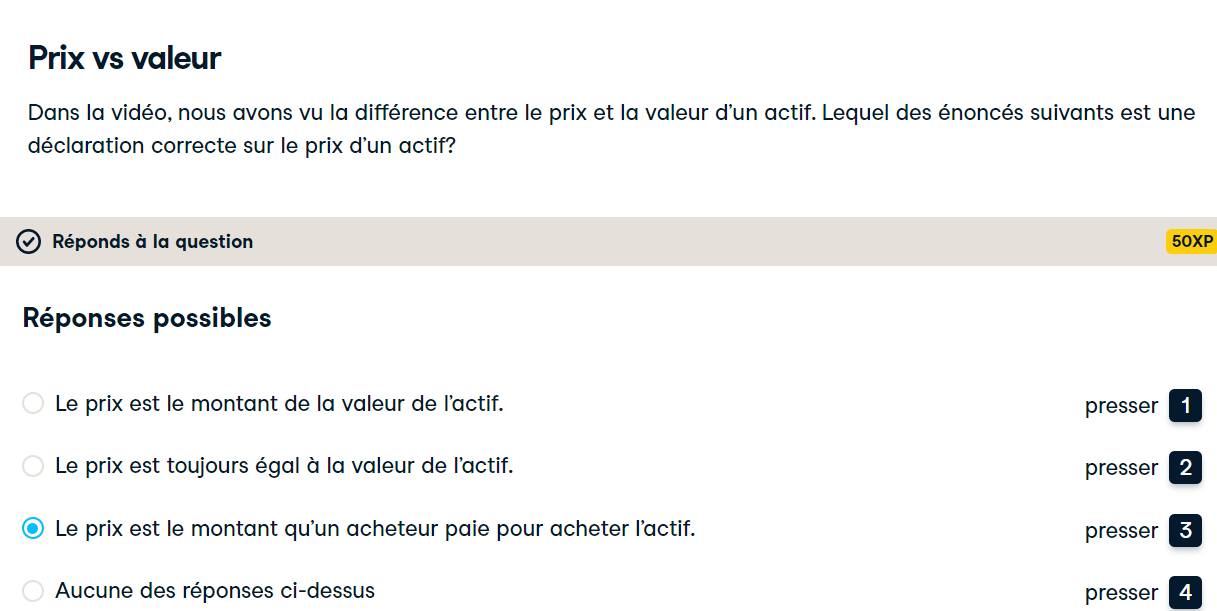

***Exactement! Le prix est simplement le montant que l’acheteur paie pour acheter l’actif, mais il ne détermine pas nécessairement la valeur de l’actif.***

###**Valeur temporelle de l’argent**

####**1. Valeur temporelle de l’argent**
+ ***Lors du calcul des évaluations obligataires, nous devons comprendre la valeur temporelle de l’argent (ou TVM).***

####**2. Valeur temporelle de l’argent (TVM)**
+ Plus précisément, la valeur d’un actif est la valeur actuelle des flux de trésorerie futurs prévus générés par cet actif. 
+ L’intuition derrière cela est que 

  + la valeur de 1 $ 

  + aujourd’hui vaut plus pour vous que 
  
  + 1 $ demain 
  
  + parce que vous pouvez investir le 1 $ que vous avez aujourd’hui à un certain rendement afin d’obtenir plus d’argent à l’avenir. 
  
+ Une autre façon de voir les choses est la suivante. 

+ Supposons que vous gagniez 10 000 $ dans un jeu télévisé, lequel des éléments suivants choisiriez-vous? 

+ Vous recevrez 10 000 $ aujourd’hui ou dans un an? 

+ Si vous avez l’argent aujourd’hui, vous pouvez l’investir et obtenir plus de 10 000 $ l’année prochaine. 

+ L’animateur de jeu télévisé doit donc vous offrir plus de 10 000 $ 

  + pour vous inciter à recevoir les 10 000 $ dans un an.

####**3. Valeur future**

+ Qu’est-ce que la valeur future? 

+ La valeur future est la valeur de 1 $ aujourd’hui l’année prochaine, dans deux ans, et ainsi de suite. 

+ Puisque nous devons être indemnisés pour accepter de renoncer à recevoir ce 1 $ aujourd’hui, 

  + nous avons besoin d’un taux d’intérêt « r » qui vous fera accepter d’abandonner ce 1 $ aujourd’hui. 
  
+ Nous pouvons calculer cela comme suit. 

+ La valeur future dans un an « fv1 » est égale à la valeur actuelle « pv » multipliée par un plus le taux d’intérêt « r ». 
+ De même, la valeur future dans deux ans « fv2 » est simplement le « fv1 » augmenté à un plus le taux d’intérêt « r ». 

+ Ainsi, plus vous recevez le flux de trésorerie dans le futur, plus vous devez être rémunéré.

####**4. Valeur actualisée**

+ L’inverse de la valeur future est la « valeur actuelle ». 

+ La valeur actualisée nous indique la valeur actuelle de 1 $ reçue dans un an, dans deux ans, et ainsi de suite. 

+ Puisque vous préférez recevoir de l’argent aujourd’hui, 

  + vous serez prêt à recevoir moins de 1 $ aujourd’hui 
  
  + pour éviter d’avoir à attendre un an ou deux ans pour recevoir ce même 1 $. 
  
+ Nous pouvons calculer cela comme suit. 

+ La valeur actuelle « pv » est égale à la valeur future dans un an « fv1 » actualisée une période en utilisant un plus le taux d’intérêt « r ». 

+ De même, la valeur actualisée d’un flux de trésorerie reçu dans deux ans est actualisée sur deux périodes.

###**5. TVM appliquée aux obligations**
+ Nous pouvons appliquer ces concepts de valeur temporelle de l’argent (ou TVM) aux obligations. Utilisons l’exemple suivant. 

+ Prenons l’exemple d’une obligation d’une valeur nominale (ou nominale) de 100 $. 

+ L’obligation paie un taux de coupon fixe de 5% et vient à échéance dans 5 ans. 

+ Son prix aujourd’hui est de 100 $. Devriez-vous acheter cette obligation?

####**6. Compromis de l’investisseur obligataire**
+ Pour déterminer la valeur de l’obligation, nous pouvons montrer graphiquement les sorties de trésorerie et les entrées au fil du temps. 

+ Aujourd’hui, nous sommes l’année 0 et vous devrez payer 100 $ pour acheter l’obligation. 

+ Ensuite, vous recevez 5 $ dans les années 1 à 4. 

+ Au cours de l’année 5, 
  + vous recevez le dernier paiement du coupon de 5 $ 
  
  + plus le paiement du capital de 100 $. 
  
+ Après cela, l’obligation arrive à échéance et n’est plus en circulation.

####**7. Comparaison des flux de trésorerie**
+ Pour savoir s’il vaut la peine d’abandonner les 100 $ aujourd’hui, 

  + vous devez savoir si la valeur actuelle des coupons et des paiements de capital est supérieure à 100 $. 
  
+ Pour ce faire, vous prenez les 5 $ de l’année 1 et calculez leur valeur actualisée. 

+ Vous faites la même chose pour les 5 $ de l’année 2, de l’année 3 et de l’année 4. 

+ L’année 5, vous calculez la valeur actualisée des 105 $. La somme de ces valeurs actuelles est égale à la valeur de l’obligation. 

+ Si la somme des valeurs actuelles dépasse 100 $, vous achetez l’obligation. 

+ Si elle est inférieure à 100 $, vous n’achetez pas l’obligation.

####**8. Entraînons-nous!**
+ Vous allez maintenant appliquer le concept de valeur temporelle de l’argent dans les exercices suivants.

###**EXERCICES**

####**Calcul de la valeur future d'une obligation**

+ Rappelez-vous de la vidéo que: 

  + **la valeur future de 100 $**

  + **sera supérieure à 100 $** 
  
+ **parce que vous devez être indemnisé pour le coût d'opportunité (par exemple, le taux d'intérêt) auquel vous renoncez en n'ayant pas cet argent maintenant (et en l'investissant !). Plus longtemps vous devez renoncer à pouvoir utiliser cet argent, plus votre coût d'opportunité augmente.**

+ **Le taux de croissance du coût d'opportunité est composé,** 
  + **ce qui signifie que la valeur future de 100 $**
  
  + **dans deux ans est égale à la valeur future de 100 $ dans un an qui croît au coût d'opportunité (c'est-à-dire que le coût d'opportunité augmente à un taux composé) .**

+ *Dans cet exercice, vous calculerez la valeur future de 100 $ dans un an et dans deux ans en supposant un coût d'opportunité de 10 %.*

####**Instructions**

+ Créez pv (valeur actuelle) avec une valeur de 100.
+ Créer r (taux d'intérêt) de 0,10.
+ Calculez la valeur future de 100 $ dans un an en utilisant pv et r avec des opérations mathématiques de base dans R. 
+ Stockez ceci dans fv1.

+ Calculez la valeur future de 100 $ dans deux ans en utilisant pv et r avec des opérations mathématiques de base dans R. Stockez ceci dans fv2.

In [1]:
# Create pv
pv <- 100

# Create r
r <- 0.10

# Calculate fv1
fv1 <- pv * (1 + r)
print(fv1)

[1] 110


In [2]:
# Calculate fv2
fv2 <- pv * (1 + r)* (1 + r)
print(fv2)

[1] 121


***Excellent travail! Déterminer la valeur future en fonction de la valeur actuelle est un processus relativement simple si vous disposez de toutes les informations nécessaires.***

####**Calcul de la valeur actuelle d'une obligation**
+ ***Maintenant que vous avez calculé la valeur future à partir de la valeur actuelle, il devrait être facile d'inverser le processus.***

+ Rappelez-vous de la vidéo que si 
  + vous vous attendez à recevoir 100 $ dans un an, 
  
  + la valeur actuelle de ces 100 $ sera inférieure aujourd'hui (parce que vous préférez avoir l'argent plus tôt que plus tard). 
  
  + De plus, si nous nous attendons à recevoir 100 $ dans deux ans, 
  
  + la valeur de cela sera inférieure à la valeur actuelle de 100 $ dans un an maintenant.

+ *Dans cet exercice, vous calculerez la valeur actuelle de fv1 et fv2 en supposant un r (taux d'intérêt) de 0,10, où fv1 est une valeur future dans un an et fv2 est une valeur future dans deux ans.*

+ *Les objets fv1, fv2 et r, que vous avez générés dans l'exercice précédent, sont disponibles dans votre espace de travail.*

####**Instructions**

+ Utilisez des opérations mathématiques de base dans R pour calculer la valeur actuelle de fv1. Enregistrez ceci en pv1.
+ Répétez ce processus pour calculer la valeur actuelle de fv2. Enregistrez ceci en pv2.

In [3]:
# Calculate pv1
pv1 <- fv1 / (1 + r)

# Calculate pv2
pv2 <- fv2 /(1 + r)**2

# Print pv1 and pv2
print(pv1)
print(pv2)

[1] 100
[1] 100


***Bon travail! Calculer la valeur actuelle à partir de la valeur future (et vice-versa) est relativement trivial en utilisant des opérations mathématiques de base dans R. Comme vous pouvez le voir, vous êtes de retour là où vous avez commencé : 100 $ !***

###**Évaluation des obligations**

####**1. Évaluation des obligations**
+ Dans ce cours,

####**2. Évaluation des obligations**
+ **Nos exercices porteront sur une obligation particulière qui paie un taux de coupon fixe une fois par an et qui a une échéance fixe sans options intégrées.**

####**3. Valeur d’un actif**
+ D’un point de vue économique, la valeur de tout actif est égale à la valeur actuelle de ses flux de trésorerie futurs prévus. 
+ Ces flux de trésorerie sont actualisés à un taux d’actualisation ajusté au risque approprié. 
+ Cela se reflète mathématiquement dans l’équation de la diapositive.

####**4. Présenter les flux de trésorerie d’une obligation**
+ Les obligations ne sont pas différentes. 
+ La première étape du calcul de la valeur des obligations consiste à répartir les flux de trésorerie que nous actualisons. 
+ Avant l’échéance, l’investisseur obligataire reçoit des paiements de coupons. 
+ À l’échéance, l’investisseur reçoit le dernier paiement du coupon et la valeur nominale. 
+ Nous pouvons donc modifier l’équation de la dernière diapositive pour tenir compte de la façon dont ces flux de trésorerie sont séparés d’un point de vue mécanique. 
+ Nous reviendrons sur les apports de cette formule plus en détail plus tard. 
+ Pour l’instant, il est important de comprendre les principaux composants inclus dans cette formule.

####**5. Création d’un vecteur de flux de trésorerie**
+ Alors, comment exécutons-nous cette analyse dans R? 
+ Dans R, nous pouvons ensuite créer un vecteur de flux de trésorerie « cf » en présentant les flux de trésorerie tels quels et en nous rappelant que le dernier flux de trésorerie est égal à la valeur nominale plus le dernier paiement de coupon.

####**6. Conversion en dataframe**
+ Pour compléter l’exercice d’évaluation obligataire, nous devons être en mesure d’ajouter des variables supplémentaires au vecteur de flux de trésorerie. 
+ Pour ce faire, nous utilisons la commande data frame.

####**7. Création d’un index temporel**
+ Étant donné que chaque flux de trésorerie se produit à un moment donné, la première variable que nous devons ajouter est un indice de temps. 
+ Nous appelons cette variable « $t$ ». 
+ L’indice temporel est utilisé comme le nombre de périodes 
  - dans nos années d’exemple 
  - pendant lesquelles nous actualiserons chacun des flux de trésorerie de l’obligation.

####**8. Calcul des facteurs PV**
+ Ensuite, nous devons calculer un facteur de valeur actualisée pour actualiser les flux de trésorerie de chaque obligation. 
+ Le taux d’actualisation des obligations est appelé rendement de l’obligation. 
+ Nous discuterons des rendements plus en détail au chapitre 2, mais pour l’instant, nous supposons que le rendement est donné. 
+ Le facteur de valeur actualisée pour l’actualisation appelé « pv_factor » est égal à 1 sur 1 plus le rendement relevé à l’indice temps. 
+ Ainsi, par exemple, si nous avons un taux d’actualisation de 10%, le pv_factor pour les flux de trésorerie reçus dans 2 ans est égal à 1 sur 1 plus 10% élevé à la deuxième puissance.

####**9. VA des flux de trésorerie**
+ L’avant-dernière étape consiste à calculer la valeur actuelle de chacun des flux de trésorerie de l’obligation en multipliant chaque flux de trésorerie par le facteur PV approprié. 
+ Enfin, nous additionnons la VA des flux de trésorerie pour arriver à la valeur de l’obligation.

####**10. Entraînons-nous!**
+ Vous allez maintenant appliquer ces étapes pour évaluer une obligation dans les exercices suivants.

###**EXERCICES**

####**Présentation des flux de trésorerie de l’obligation**

+ ***Dans la prochaine série d’exercices, vous allez créer un cadre de données de flux de trésorerie comme dans la vidéo précédente.***

+ **Supposons que vous envisagiez d’investir dans une obligation d’une valeur nominale de 100 $, d’un taux de coupon de 5 % et d’une échéance de 5 ans.** 

+ **Le taux de coupon est l’intérêt que vous gagnez en détenant l’obligation, donc avant l’échéance de l’obligation, vous recevrez 5 $ de paiements de coupon chaque année.** 

+ **À l’échéance, vous recevrez également la valeur nominale de 100 $.**

+ *Dans cet exercice, vous allez créer un vecteur cf qui présente les flux de trésorerie de cette obligation. Vous convertirez ensuite ce vecteur en une trame de données, afin de pouvoir ajouter des colonnes de données supplémentaires requises dans les analyses ultérieures.*

####**Instructions**

+ Créez un vecteur cf qui contient les flux de trésorerie de l’obligation. 
+ Rappelez-vous que 

  + les flux de trésorerie sont de 5 $ pour les 4 premières années 
  
  + et de 105 $ la 5e année.

+ Permet de convertir cf en trame de données data.frame().

In [4]:
# Create vector of cash flows
cf <- c(5, 5, 5, 5, 105)

# Convert to data frame
cf <- data.frame(cf)
cf

cf
<dbl>
5
5
5
5
105


***Excellent travail! Cet objet cf très basique représente la première étape vers un modèle de valorisation obligataire plus robuste. Dans le prochain exercice, vous développerez ce bloc de données pour inclure des informations supplémentaires.***

####**Actualisation des flux de trésorerie obligataires à rendement connu**

+ ***Après avoir établi les flux de trésorerie de l'obligation, nous pouvons maintenant passer par les étapes de calcul de la valeur actuelle de chaque flux de trésorerie et évaluer l'obligation. Rappelons que la valeur de l'obligation est la somme de la valeur actuelle de ses flux de trésorerie.***

+ **Dans cet exercice, vous calculerez le facteur de valeur actuelle approprié, pv_factor, pour chaque flux de trésorerie, afin que nous puissions calculer la valeur actuelle $pv$ de chaque flux de trésorerie. Vous additionnerez ensuite les $pv$ pour trouver la valeur de l'obligation.**

+ *Rappelons que cette obligation a un rendement de 6%, qui fait office de taux d'actualisation. Le bloc de données que vous avez créé dans l'exercice précédent, $cf$, est présent dans votre espace de travail.*

####**Instructions**

+ Créez une nouvelle colonne, $t$, dans votre bloc de données $cf$ pour indiquer l'année au cours de laquelle le flux de trésorerie est reçu. 

+ Notez que pour vos besoins, l'année équivaut au nom des lignes de votre bloc de données (1, 2, 3, etc.). 

+ Cela signifie que vous pouvez simplement utiliser rownames() pour nommer $t$. 

+ Utilisez as.numeric() pour vous assurer que les valeurs de $t$ sont numériques.


+ Créez une autre nouvelle colonne, pv_factor dans votre objet $cf$ pour stocker le facteur de valeur actuelle de chaque année. 

+ Rappelez-vous que le facteur de valeur actuelle de chaque année est calculé comme 1 divisé par 1 + le taux de rendement (dans ce cas 6 %, ou 0,06) fixé à la puissance de votre variable temporelle ($t$).


+ Créez une colonne $pv$ dans $cf$ pour stocker la valeur actuelle du flux de trésorerie de chaque année. 

+ La valeur actuelle est calculée comme le flux de trésorerie ($cf$) multiplié par le facteur de valeur actuelle de l'année (pv_factor).


+ Enfin, utilisez sum() pour additionner les valeurs de $pv$ afin de trouver la valeur de la liaison.

In [5]:
# Add column t to cf
cf$t <- as.numeric(c(1,2,3,4,5))

# Calculate pv_factor
cf$pv_factor <- 1 / (1 + 0.06)^cf$t

# Calculate pv
cf$pv <- cf$cf * cf$pv_factor

# Calculate the bond price
sum(cf$pv)

[1] 95.78764

***Excellent travail! Le calcul du prix des obligations à l'aide de trames de données dans R vous permet de suivre une poignée de variables complexes. Dans ce cas, le prix global des obligations devrait être fixé à environ 96 $.***

###**Convertissez votre code en fonction**

####**1. Convertissez votre code en fonction**
+ ***Vous allez valoriser de nombreux liens dans le reste de ce cours en suivant les mêmes étapes que celles décrites dans la série d’exercices précédente.***

####**2. Fonction d’évaluation des obligations**
+ Pour simplifier ce processus, il est judicieux de créer une fonction d’évaluation des obligations. 
+ De cette façon, vous limitez la possibilité de faire des erreurs car vous n’avez pas besoin de réécrire plusieurs lignes de code chaque fois que vous évaluez une obligation.

####**3. Étapes de l’évaluation des obligations**
+ Nous gardons toujours l’approche étape par étape d’avant, mais cette fois, nous devons généraliser les entrées afin que la fonction puisse évaluer les obligations avec différents coupons et échéances. 

+ La première chose que nous faisons est d’utiliser des noms de variables au lieu de valeurs réelles. 

+ bDonc, nous utilisons « $p$ » pour la valeur nominale au lieu de, disons, 100 $. 

+ Nous utilisons « $r$ » pour le taux de coupon au lieu de, disons, 5% ou 0 (point) 05. 

+ Nous utilisons « ttm » pour le temps jusqu’à maturité au lieu de, disons, 5 ans. 

+ Nous utilisons « $y$ » pour le rendement au lieu de, disons, 4 %. 

+ Ces variables - $p$, $r$, ttm et $y$ - sont les entrées requises par la fonction d’évaluation des obligations. 

+ Le code est également modifié pour rendre certaines étapes plus génériques. Maintenant, passons en revue chacune de ces étapes pour voir ce que nous avons changé.

####**4. Étapes de l’évaluation des obligations**

+ La première étape consiste à construire un vecteur de flux de trésorerie « $cf$ ». 

+ Pour le vecteur de flux de trésorerie « $cf$ », nous devons permettre au code d’être flexible et générer automatiquement les paiements de coupon et le paiement du principal en fonction de la valeur nominale de l’obligation, du taux de coupon et du délai jusqu’à l’échéance. 

+ Nous utilisons la commande $rep()$, qui prend deux entrées: $X$ et $Y$. 

+ Il répète essentiellement $Y$ fois la valeur de $X$. Cela correspond à la façon dont nous modélisons les paiements de coupons avant l’échéance. 

+ Ainsi, $X$ est égal à la valeur nominale multipliée par le taux de coupon et $Y$ est égal au délai jusqu’à l’échéance moins 1. 

+ Ensuite, l’élément final du vecteur de flux de trésorerie doit être égal au dernier paiement du coupon plus le capital. Mathématiquement, cela équivaut à la valeur nominale multipliée par un plus le taux de coupon '$r$'.

###**5. Étapes de l’évaluation des obligations**

+ L’étape suivante consiste à convertir le vecteur '$cf$' en une trame de données afin que nous puissions ajouter des variables aux données. 

+ Ceci est similaire à l’étape que nous avons utilisée dans la dernière section. 

+ Ensuite, nous créons un index de temps '$t$' un objet dont les valeurs sont égales à 1, 2, 3, 4, etc. 

+ jusqu’à l’échéance de l’obligation. Heureusement, l’étiquette des lignes du vecteur de flux de trésorerie '$cf$' répond à cet objectif. 

+ Ainsi, à l’aide de la commande rownames, nous pouvons extraire ces valeurs et les placer dans la variable time index '$t$'. 

+ Ensuite, pour nous assurer que les valeurs sont lues sous forme de nombres, nous utilisons la commande as numeric.

####**6. Étapes de l’évaluation des obligations**

+ Les trois dernières étapes sont semblables à la discussion de la dernière section lorsque nous avons procédé à l’évaluation étape par étape. 

+ Tout d’abord, nous calculons un facteur de valeur actualisée « pv_factor ». 

+ Ensuite, nous calculons la valeur actuelle de chaque flux de trésorerie « pv » en multipliant chaque flux de trésorerie par le pv_factor approprié. 

+ Enfin, nous additionnons la valeur actuelle de chaque flux de trésorerie pour arriver à la valeur de l’obligation.

####**7. Envelopper le code**
+ La dernière étape du processus d’écriture de fonction consiste à envelopper le code avec une ligne au début et une autre ligne à la fin. 

+ Dans la première ligne, nous configurons la fonction d’évaluation des obligations 'bondprc()'. 

+ La première ligne de code montre que la fonction bondprc() prend comme entrées « $p$ », « $r$ », « $ttm$ » et « $y$ ». 

+ La première ligne se termine par une accolade ouverte, après quoi nous voyons les 6 lignes du code d’évaluation des obligations dont nous avons discuté précédemment. 

+ Enfin, nous ajoutons la dernière ligne du code ci-dessous, qui est simplement une accolade fermée pour mettre fin à la fonction. Cela complète notre fonction d’évaluation des obligations!

####**8. Entraînons-nous!**
+ Il est maintenant temps pour vous de créer votre propre fonction d’évaluation des obligations. Entraînons-nous!

###**EXERCICES**

####**Convertissez votre code en une fonction d'évaluation des obligations**

+ ***Dans les exercices précédents, vous avez expliqué étape par étape comment calculer la valeur d'une obligation. Cependant, effectuer toutes ces étapes à plusieurs reprises pour évaluer de nombreuses obligations sera fastidieux. Heureusement, vous pouvez créer une fonction pour effectuer ces mêmes calculs à plusieurs reprises pour différentes obligations.***

+ **La fonction que vous créez doit avoir la souplesse nécessaire pour vous permettre de saisir les caractéristiques clés de l'obligation. Spécifique à notre exemple précédent, vous aurez besoin de la fonction pour pouvoir intégrer la valeur nominale d'une obligation, le taux du coupon, la durée jusqu'à l'échéance et le rendement.**

+ *Dans cet exercice, vous allez créer la fonction bondprc qui utilise ces quatre entrées pour calculer la valeur d'une obligation. Rappelez-vous que pour créer une fonction, vous pouvez utiliser function(input 1, input 2, ...) { [lines of code] }.*

####**Instructions**

+ Une fonction partiellement construite, bondprc, a été générée dans votre espace de travail. 

+ Complétez la fonction en construisant la commande function() et en fournissant les noms de quatre entrées : 
  + $p$ pour la valeur nominale, 
  + $r$ pour le taux du coupon, 
  + $ttm$ pour la durée jusqu'à l'échéance 
  + $y$ pour le rendement.

+ Vérifiez que la fonction 
  + bondprc nous donne un prix de 95,79 $ pour la valeur d'une obligation avec 
  
  + une valeur nominale de 100 $, un taux de coupon de 5 %, 5 ans jusqu'à l'échéance et 6 % de rendement jusqu'à l'échéance.

In [6]:
# Create function
bondprc <- function(p, r, ttm, y) {
  cf <- c(rep(p * r, ttm - 1), p * (1 + r))
  cf <- data.frame(cf)
  cf$t <- as.numeric(rownames(cf))
  cf$pv_factor <- 1 / (1 + y)^cf$t
  cf$pv <- cf$cf * cf$pv_factor
  sum(cf$pv)
}

In [7]:
# Verify prior result
bondprc(100, 0.05, 5, 0.06)

[1] 95.78764

***Bon travail! Bien qu'il soit important de parcourir chaque étape du processus pour comprendre comment calculer les prix des obligations, vous devez toujours essayer de créer une fonction appropriée lorsque vous êtes confronté à un calcul complexe et répétitif.***

###**Relation prix-rendement**

####**1. Relation prix-rendement**
+ ***Il existe une relation inverse entre le prix d’une obligation et son rendement.***

####**2. Relation inverse**

+ ***Lorsque les rendements augmentent, les prix des obligations baissent. En effet, lorsque les rendements augmentent, un investisseur qui achète cette obligation ne peut obtenir un rendement supplémentaire que lorsque le prix de l’obligation est plus bas. Sinon, l’investisseur n’achèterait pas l’obligation parce qu’elle offre des rendements inférieurs à ceux du marché. À l’inverse, lorsque les rendements baissent, les prix des obligations augmentent.***

####**3. Notations de crédit**
+ Les rendements obligataires sont liés au risque d’investir dans des obligations. 

+ Une façon importante de déterminer le niveau de risque relatif de différentes obligations consiste à examiner la cote de crédit de l’obligation. 

+ Les notations de crédit sont émises par des sociétés appelées « agences de notation ». 

+ Les trois plus importants sont Standard & Poor’s, Fitch et Moody’s. 

+ Les notations de crédit peuvent être divisées en deux grands groupes : Investment Grade et High Yield. 

+ Investment Grade sont des obligations notées BBB ou plus par S&P et Fitch ou Baa et supérieures par Moody’s. 

+ Alternativement, les obligations à haut rendement sont essentiellement tout ce qui est inférieur à la catégorie investissement et sont parfois appelées « obligations de pacotille ». 

+ Cette distinction entre investment grade et high yield est importante. 

+ De nombreuses institutions, telles que certaines banques, ne sont autorisées à investir que dans des obligations de première qualité. 

+ Cela s’explique en partie par le fait que la probabilité de défaut de l’émetteur augmente considérablement entre les obligations de la note d’investissement la plus basse et les obligations de la note à haut rendement la plus élevée.

####**4. Détermination du rendement d’une obligation**

+ Les notations de crédit jouent également un rôle dans l’évaluation des obligations. 

+ Ils permettent aux investisseurs de comparer le niveau de risque de différentes obligations. 

+ Par exemple, les obligations notées Baa pourraient être considérées comme ayant un profil de risque similaire.

+ Ainsi, pour déterminer le rendement nécessaire pour actualiser les flux de trésorerie d’une obligation, vous pouvez envisager d’utiliser le rendement des obligations ayant une cote de crédit comparable. 

+ Par exemple, pour évaluer une obligation notée Baa, vous pouvez utiliser l’indice Moody’s Baa. 

+ Cet indice est directement disponible en R à l’aide du package Quandl, qui collecte des données financières et économiques dans un seul package R. 

+ Pour utiliser Quandl, il vous suffit d’entrer le ticker de l’index que vous souhaitez charger. 

+ Dans ce cas, le ticker est « MOODY/DBAAYLD ». Une fois que vous avez enregistré l’index dans R, vous pouvez afficher sa valeur à n’importe quelle date et même extraire des dates particulières pertinentes pour votre analyse.

####**5. Entraînons-nous!**
+ Dans l’exercice suivant, nous utilisons le rendement de Moody’s Baa au 30 septembre 2016 pour évaluer l’obligation du chapitre précédent.

###**EXERCICES**

####**Notations de crédit**
+ ***Quelle est la note d’investissement la plus basse selon l’échelle S&P ?***

####**Réponds à la question**

+ AAA
+ A
+ ***BBB***
+ B

***Exactement! La notation BBB de S&P est la note la plus basse de la catégorie investment grade. En dessous de la catégorie investissement, S&P a également une poignée de notations à haut rendement.***

####**Le rendement de l'indice Moody's Baa**

+ ***Dans le chapitre précédent, vous avez évalué une obligation avec une valeur nominale de 100 $, un taux de coupon de 5 % et une échéance de 5 ans. Vous avez ensuite supposé un rendement à l'échéance de 6 % pour cette obligation. Rappelez-vous de la vidéo que le rendement d'une obligation peut être estimé en regardant le rendement d'obligations comparables.***

+ *Dans cet exercice, vous supposerez que l'obligation que vous avez évaluée a une cote de crédit Baa par Moody's et que l'obligation sera émise le 30 septembre 2016. Avec ces informations, vous pouvez utiliser le package [Quandl()](https://www.rdocumentation.org/packages/Quandl/versions/2.11.0) dans R pour obtenir le rendement de l'indice Moody's Baa (utiliser le ticker "FED/RIMLPBAAR_N_M"") le 30 septembre 2016.*

####**Instructions**

+ Utilisez library() pour charger le package Quandl.
+ Utilisez la commande Quandl() du package Quandl pour obtenir des données sur l'indice Baa de Moody ("FED/RIMLPBAAR_N_M"). 
+ Enregistrez ces données dans baa.
+ Identifiez le rendement de baa le 30 septembre 2016 à l'aide de la commande subset(). 
+ Enregistrez ceci dans baa_yield.
+ Convertissez baa_yield du pourcentage en décimales à l'aide d'opérations mathématiques de base. 
+ La colonne correspondante est enregistrée dans baa_yield$Value et doit être divisée par 100.
+ Enfin, affichez baa_yield.

In [10]:
# Load Quandl package
library(Quandl)

# Obtain Moody's Baa index data
baa <- Quandl("FED/RIMLPBAAR_N_M")

# Identify 9/30/16 yield
baa_yield <- subset(baa, baa$Date == "2016-09-30")

# Convert yield to decimals and view
baa_yield <- baa_yield$Value / 100
baa_yield

[1] 0.0431

***Bon travail! Il semble que le rendement de l'indice Moody's Baa au 30 septembre 2016 était d'environ 4,31 %, soit 0,0431. Dans le prochain exercice, vous utiliserez ce rendement pour déterminer la valeur de votre obligation.***

####**Évaluez l'obligation à 5 % en utilisant le rendement Baa que vous avez trouvé**

+ ***Lors de l'exercice précédent, vous avez constaté que le rendement des obligations comparables est de 4,29 %.***

+ **Maintenant que vous connaissez le rendement, vous pouvez utiliser ces informations pour trouver la valeur d'une obligation notée Baa au 30 septembre 2016 avec une valeur nominale de 100 $, un taux de coupon de 5 % et une échéance de 5 ans.**

+ *Dans cet exercice, vous utiliserez la fonction bondprc que vous avez créée au chapitre 1 pour évaluer l'obligation. L'objet que vous avez créé dans l'exercice précédent (baa_yield) est disponible dans votre espace de travail.*

####**Instructions**

+ Utilisez bondprc() pour évaluer votre obligation. 
+ Rappelez-vous du chapitre un que la fonction bondprc() que vous avez créée prend quatre arguments : 
  + la valeur nominale ($p$), 
  + le taux du coupon ($r$), 
  + le délai jusqu'à l'échéance ($ttm$)  
  + le rendement de l'obligation ($y$).

In [11]:
# Value bond
bondprc(p = 100, r = 0.05, ttm = 5, y = baa_yield)

[1] 103.0452

***Bon travail!***

  + ***Vos calculs suggèrent que l'obligation est évaluée à environ 103 $***

  + **alors que sa valeur nominale n'est que de 100 $.**

####**Tracé de la relation prix/rendement**

+ ***Bien qu'il existe une relation inverse entre le prix et le rendement, cette relation n'est pas linéaire. Cela signifie que les variations de prix dues à une variation du rendement peuvent différer considérablement selon que le rendement augmente ou diminue. Nous reviendrons sur ce concept important lorsque nous aborderons le concept de convexité au chapitre trois et comment un ajustement est nécessaire pour tenir compte de cette relation courbe entre le prix et le rendement d'une obligation. Pour l'instant, gardez simplement à l'esprit que cette relation inverse n'est pas linéaire.***

+ *Dans cet exercice, vous supposerez que vous avez une obligation d'une valeur nominale de 100 $, d'un taux de coupon de 10 % et d'une échéance de 20 ans. Notez que c'est différent du lien avec lequel vous avez travaillé jusqu'à présent ! Votre objectif est d'évaluer cette obligation à différents niveaux de rendement à l'aide de votre fonction bondprc(), disponible dans votre espace de travail.*

####**Instructions**

+ Créez le vecteur prc_yld de 2 % (0,02) à 40 % (0,40) par incréments de 1 % (0,01) en utilisant la fonction seq().

+ Utilisez data.frame() pour convertir prc_yld en une trame de données.

+ Utilisez la boucle for pré-écrite avec bondprc() pour calculer le prix des obligations à différents niveaux de rendement dans prc_yld. 

+ Essayez de comprendre le comportement de la boucle.


+ Votre objet prc_yld contient maintenant une colonne pour le rendement (prc_yld) et une colonne pour le prix (price). 

+ Tracez cet objet à l'aide du code pré-écrit pour voir la relation entre le prix et le rendement à l'échéance (YTM).

In [12]:
# Generate prc_yld
prc_yld <- seq(from = 0.02, to = 0.40, by = 0.01)

# Convert prc_yld to data frame
prc_yld <- data.frame(prc_yld)

# Calculate bond price given different yields
for (i in 1:nrow(prc_yld)) {
     prc_yld$price[i] <- bondprc(100, 0.10, 20, prc_yld$prc_yld[i])  
}

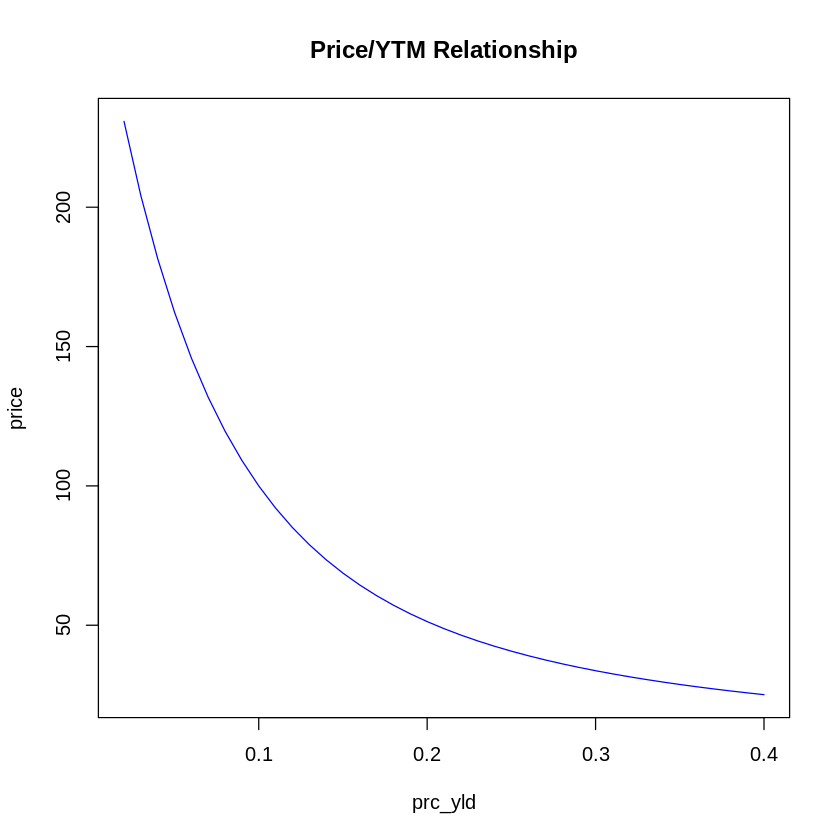

In [13]:
# Plot P/YTM relationship
plot(prc_yld,
     type = "l",
     col = "blue",
     main = "Price/YTM Relationship")

***Bien joué! Votre graphique montre une relation inverse claire entre le prix et prc_yld (ou rendement). Vous explorerez les détails techniques de cette relation dans les chapitres suivants.***

###**Composantes du rendement**

####**1. Composantes du rendement**
+ ***Plus l’obligation est risquée, plus son rendement est élevé.***

####**2. Composante de base du rendement**
+ Ainsi, une obligation qui ne supporte aucun risque de défaut doit générer un rendement sans risque. 

+ Un taux de référence pour le rendement d’une obligation est le rendement d’un titre du Trésor américain ayant une échéance similaire. 

+ C’est le taux d’intérêt minimum qu’un investisseur exigera. 

+ Notez que le rendement sans risque est différent à différents moments. 

+ En effet, les rendements des bons du Trésor sont affectés par la croissance de l’économie, les taux d’intérêt généraux du marché et l’inflation. 

+ Cela signifie que le taux de référence pourrait être supérieur ou inférieur selon le moment où l’obligation est évaluée.

####**3. Obtention des données de trésorerie**
+ Vous pouvez obtenir des données sur les rendements du Trésor américain à partir de la base de données électronique de la Réserve fédérale ou FRED. 

+ Cela peut être consulté via le paquet quantmod, qui est un package R conçu autour de la modélisation financière. 

+ Pour charger des données FRED dans votre espace de travail R, utilisez la commande getSymbols de quantmod avec le symbole des bons du Trésor à 10 ans, ou 'DGS10'. 

+ Le code R utilisé pour télécharger les rendements des bons du Trésor américain à 10 ans avec le symbole DGS10 est indiqué ici. 

+ Comme vous pouvez le voir, la commande getSymbols charge quotidiennement une série chronologique de débits.

####**4. Composante spread du rendement**

+ Il existe une autre composante des rendements obligataires appelée spread. 

+ Par rapport aux obligations d’État, une obligation de société est relativement plus risquée. 

+ En conséquence, son rendement a besoin d’un niveau de rendement supplémentaire en plus du rendement sans risque pour compenser l’investisseur pour avoir pris le type spécifique de risques liés à la détention d’une obligation spécifique. 

+ Ce rendement supplémentaire est le spread. 

+ L’écart est principalement composé du risque de crédit. 

+ C’est le risque que l’émetteur fasse défaut avant que tous les flux de trésorerie promis ne soient payés.

####**5. Risques liés à l’investissement dans des obligations**

+ En plus du risque de crédit, les obligations peuvent également être exposées à un certain nombre d’autres risques, tels que le « risque d’inflation », le « risque d’achat » et le « risque de liquidité ». 

+ Le « risque d’inflation » se produit lorsque l’inflation absorbe la valeur des flux de trésorerie que vous recevez de l’obligation. 

+ C’est à ce moment-là que le même doller ne peut pas acheter autant à l’avenir qu’il aurait pu l’avoir aujourd’hui. 

+ On parle de « risque d’achat » lorsqu’un émetteur obligataire a la possibilité d'« appeler » ou de racheter l’obligation. 

+ L’émetteur ne le fera que lorsque le rachat est avantageux pour lui, ce qui signifie qu’il est à un moment désavantageux pour l’investisseur obligataire. 

+ Le « risque de liquidité » est le risque que, lorsque vous voulez vendre l’obligation, vous ne puissiez pas la vendre à un prix égal ou proche de la valeur de l’obligation. 

+ Étant donné que de nombreuses obligations ne se négocient pas fréquemment, le risque de liquidité pourrait être un problème pour de nombreux investisseurs. Ces risques obligent l’émetteur obligataire à payer une « prime de risque ». 

+ Cette « prime de risque » est principalement quantifiée dans le « spread », qui s’ajoute au rendement sans risque de base pour arriver au rendement de l’obligation.

####**6. Primes de risque variables dans le temps**

+ Tout comme le rendement sans risque, l’écart n’est pas constant dans le temps. 

+ Sa taille dépend de l’appétit actuel du marché pour le risque. 

+ Lorsque les marchés sont nerveux, comme lors de la crise financière de 2008/2009, les investisseurs obligataires ont exigé une prime de risque plus élevée. 

+ Vous pouvez le constater en traçant l’écart Investment Grade, qui est la différence entre le rendement des obligations investment grade les plus élevées et le rendement des obligations investment grade les plus basses. 

+ Dans l’échelle de Moody’s, cela signifie la différence entre les rendements des obligations Aaa et Baa. 

+ Nous pouvons obtenir les rendements de ces indices à partir du package Quandl comme indiqué dans la vidéo précédente.

####**7. Entraînons-nous!**
+ Dans les exercices qui suivent, vous obtiendrez et tracerez le rendement sans risque et l’écart investment grade. 
+ Vous pourrez alors constater par vous-même la nature variable dans le temps de ces deux composantes du rendement d’une obligation.

###**EXERCICES**

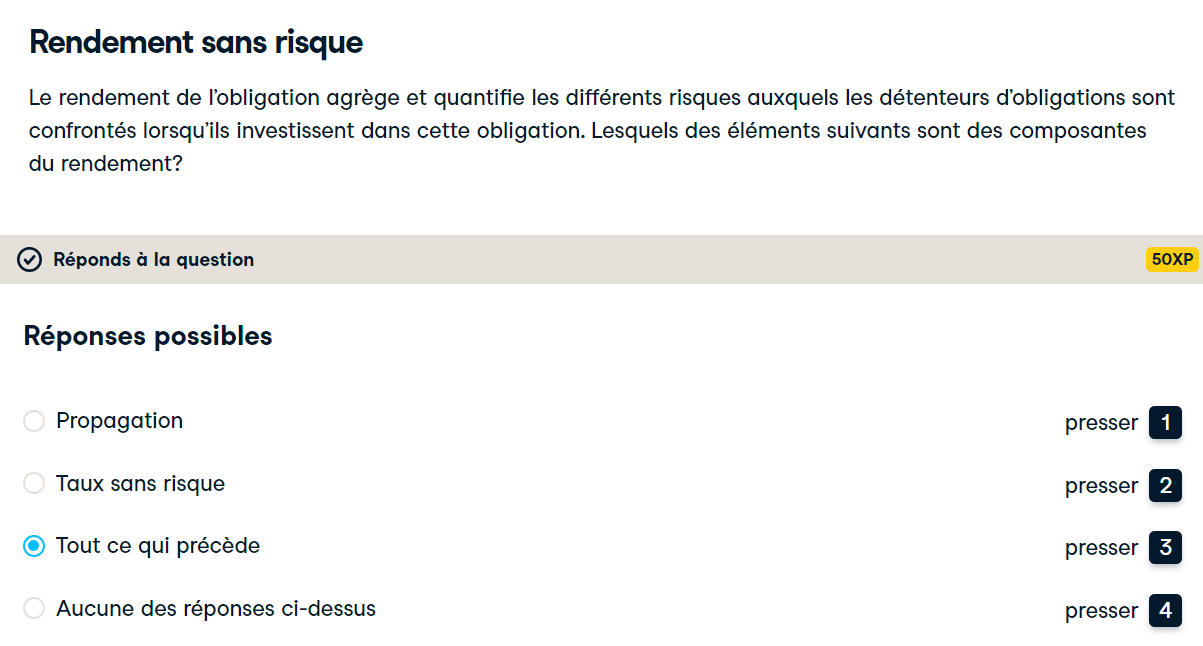

***Exactement! Le rendement est composé du taux sans risque ainsi que du spread, qui est conçu pour compenser les investisseurs qui prennent des risques.***

####**Tracer les rendements du Trésor américain**

+ ***Étant donné que les obligations de sociétés sont plus risquées que les bons du Trésor américain, le taux sans risque est le taux de référence auquel nous nous attendons à ce que les obligations de sociétés produisent. Cependant, les rendements des bons du Trésor américain ne sont pas constants et pourraient changer considérablement au fil du temps. Nous pouvons le voir en traçant les données de rendement du Trésor américain sur une longue période.***

+ **Dans cet exercice, vous utiliserez le package [quantmod()]('https://www.rdocumentation.org/packages/quantmod/versions/0.4.20') pour obtenir et tracer les données de rendement du Trésor américain sur 10 ans à partir de la base de données électronique de la Réserve fédérale (FRED) de janvier 2006 à septembre 2016.**

+ *La commande [getSymbols()]('https://www.rdocumentation.org/packages/quantmod/versions/0.4.20/topics/getSymbols') de quantmod vous permet d'accéder à la base de données FRED en spécifiant l'argument Symbols (dans ce cas, à "DGS10" pour les bons du Trésor américain à 10 ans). Vous devrez également définir l'argument src égal à "FRED" et définir auto.assign sur FALSE.*

###**Instructions**

+ Chargez le package quantmod.
+ Utilisez getSymbols() de quantmod pour obtenir des données sur DGS10 à partir de FRED. Assurez-vous de définir l'argument auto.assign sur FALSE. Enregistrez ces données dans t10yr.
+ Sous-définissez vos données t10yr sur la période de janvier 2006 à septembre 2016 en utilisant le format data["date1/date2"].
+ Utilisez le code pré-écrit pour tracer vos données t10yr.

In [17]:
# Load quantmod package
library(quantmod)

# Obtain Treasury yield data
t10yr <- getSymbols(Symbols = "DGS10", src = "FRED", auto.assign = FALSE)

# Subset data
t10yr <- t10yr["2006-01/2016-09"]

In [18]:
head(t10yr)

           DGS10
2006-01-02    NA
2006-01-03  4.37
2006-01-04  4.36
2006-01-05  4.36
2006-01-06  4.38
2006-01-09  4.38

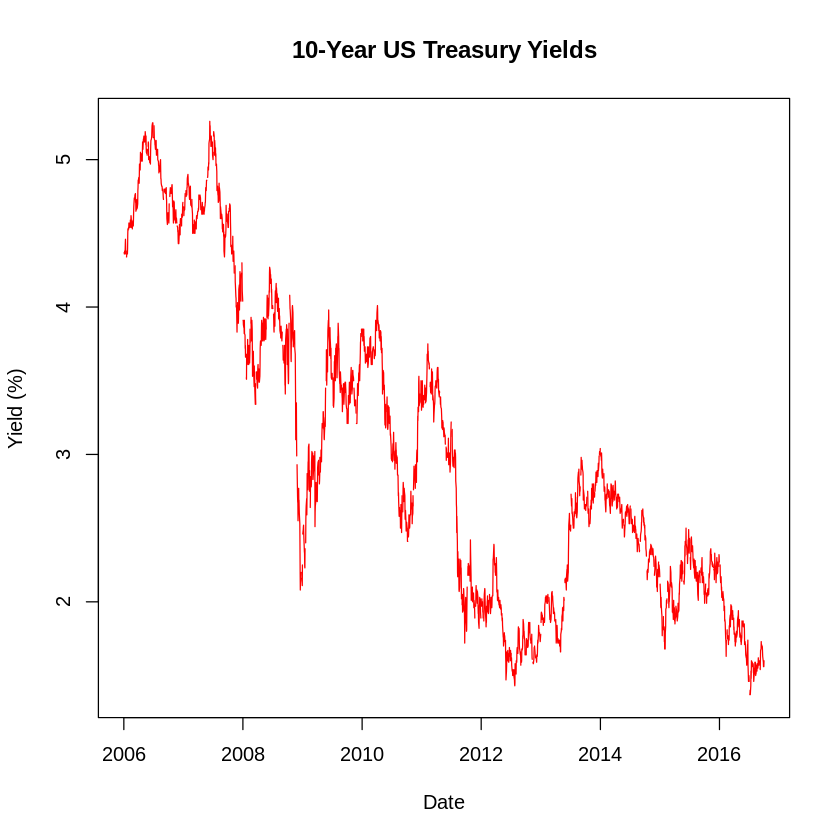

In [19]:
# Plot yields
plot(x = index(t10yr),
     y = t10yr$DGS10,
     xlab = "Date",
     ylab = "Yield (%)",
     type = "l",
     col = "red",
     main = "10-Year US Treasury Yields")

***Bon travail! Avec Quandl, le package quantmod est un moyen rapide et facile d'accéder aux données financières.***

####**Tracé de l'écart de qualité d'investissement**

+ ***Outre l'évolution du taux sans risque dans le temps, un autre déterminant du rendement des obligations d'entreprise est la taille de l'écart de crédit, qui évolue également dans le temps. Une façon d'observer cet écart est de comparer le rendement des obligations de qualité investment grade les mieux notées (notation Aaa) et le rendement des obligations de qualité investment grade les plus basses (notation Baa).***

+ **L'écart de qualité investissement (IG) peut être considéré comme la perception du marché du risque d'investir dans des obligations à un moment donné. Plus l'écart IG est important, plus les investisseurs exigent une compensation pour investir dans des obligations plus risquées.**

+ *Dans cet exercice, vous allez tracer le spread de qualité investissement (IG) de janvier 2006 à septembre 2016. Le spread objet contient les rendements Aaa et Baa (générés à l'aide du package Quandl).*

####**Instructions**

+ Examinez les six premiers et derniers éléments de propagation en utilisant des appels à head() et tail().
+ Générez une colonne diff dans l'écart égale à la différence entre les rendements Baa (baa) et les rendements Aaa (aaa), convertie en points de pourcentage (* 100).
+ Utilisez plot() pour afficher la répartition dans le temps. 
+ Définissez 

  + l'argument $x$ égal à spread$date 
  
  + l'argument $y$ égal à spread$diff.

In [22]:
aaa <- Quandl("FED/RIMLPAAAR_N_M")
aaa <- aaa %>% 
  filter(Date >= "2006-01-01")
baa <- baa %>% 
  filter(Date >= "2006-01-01")

spread <- merge(aaa, baa, by="Date")
colnames(spread) <- c("date", "aaa", "baa")

In [23]:
# Examine first and last six elements in spread
head(spread)

,date,aaa,baa
,<date>,<dbl>,<dbl>
1,2006-01-31,5.29,6.24
2,2006-02-28,5.35,6.27
3,2006-03-31,5.53,6.41
4,2006-04-30,5.84,6.68
5,2006-05-31,5.95,6.75
6,2006-06-30,5.89,6.78


In [24]:
tail(spread)

,date,aaa,baa
,<date>,<dbl>,<dbl>
124,2016-04-30,3.62,4.79
125,2016-05-31,3.65,4.68
126,2016-06-30,3.50,4.53
127,2016-07-31,3.28,4.22
128,2016-08-31,3.32,4.24
129,2016-09-30,3.41,4.31


In [25]:
# Calculate spread$diff
spread$diff <- (spread$baa - spread$aaa) * 100

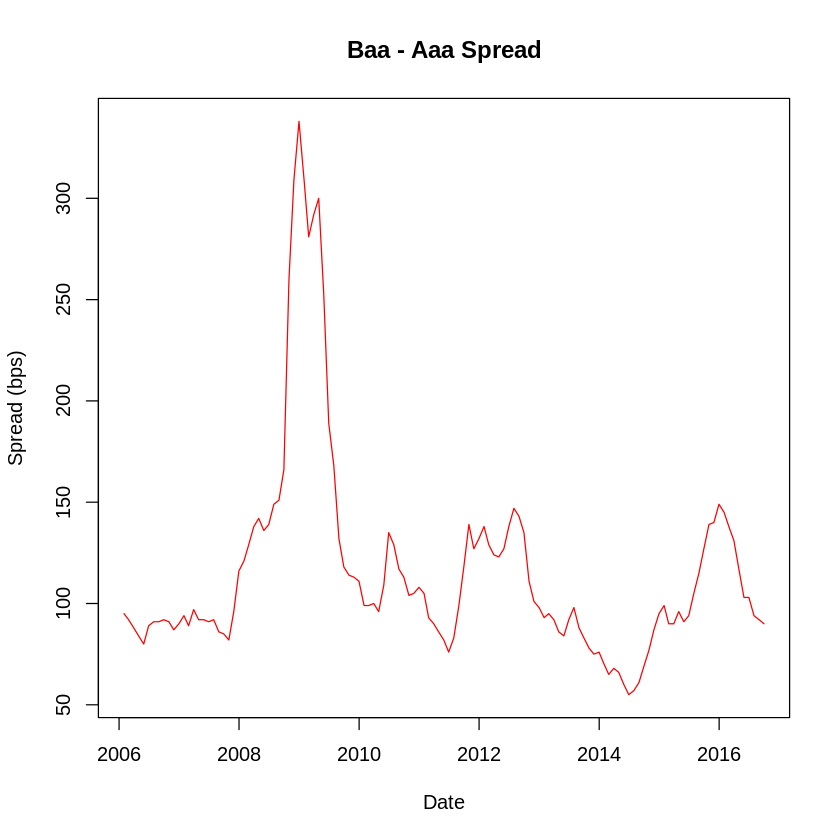

In [26]:
# Plot spread
plot(x = spread$date,
     y = spread$diff,
     type = "l",
     xlab = "Date",
     ylab = "Spread (bps)",
     col = "red",
     main = "Baa - Aaa Spread")

***Bien joué! Comme vous pouvez le constater, le spread Aaa-Baa varie considérablement dans le temps et était particulièrement élevé lors de la crise financière mondiale de la fin des années 2000.***

###**Estimation du rendement d’une obligation**

####**1. Estimation du rendement d’une obligation**

+ ***Dans la vidéo précédente, nous avons montré comment trouver le rendement d’une obligation en utilisant le rendement d’obligations comparables.***

####**2. Trouver le rendement par essais et erreurs**
+ Mais, pour une obligation négociée, nous pouvons calculer le rendement impliqué par le prix de l’obligation. 
+ Il s’agit du rendement que les participants au marché accordent à l’obligation. 
+ Pour trouver le rendement, vous utilisez l’essai et l’erreur. 
+ Vous intégrez différents rendements dans la fonction d’évaluation des obligations jusqu’à ce que la valeur que vous calculez soit égale au prix de l’obligation.

####**3. Itération à travers différentes suppositions**

+ Comment cela fonctionne-t-il? 

+ Supposons que vous ayez une obligation d’une valeur nominale de 100 $, d’un taux de coupon de 5 %, 

+ d’une échéance de 10 ans et d’un prix de 92,64 $ et que vous souhaitiez connaître le rendement. 

+ Vous faites une première supposition, disons un rendement de 5%. 

+ Cela vous donne une valeur de 100 $, mais le prix de l’obligation est inférieur. 

+ Rappelons qu’il existe une relation inverse entre le prix de l’obligation et son rendement. 

+ Vous auriez donc besoin d’une estimation de rendement plus élevée. 
+ Maintenant, vous pouvez essayer un rendement de 7%. Cela vous rapporte 85,95 $. 

+ Ce prix est trop bas, nous devons donc baisser le rendement. Maintenant, essayons 6%. 

+ Cela se traduit par une valeur de 92,64 $, ce qui correspond à notre prix. Le rendement de cette obligation est donc de 6%.

####**4. Automatisation du processus**
+ Pour une obligation, les essais et les erreurs peuvent ne pas sembler trop mauvais. 
+ Mais, avec de nombreux liens, c’est extrêmement lourd. 
+ Heureusement, R a la fonction uniroot(). 
+ Nous n’entrerons pas dans les détails de la fonction uniroot(), mais pour nos besoins, il suffit de savoir que l’utilisation de uniroot() nous permet d’automatiser le processus d’essais et d’erreurs.

####**5. Créer une fonction en utilisant uniroot()**
+ Nous créons maintenant la fonction ytm() qui applique uniroot(). 

+ Cette fonction nous oblige à créer un vecteur de flux de trésorerie modifié cf et une fonction d’évaluation obligataire modifiée bval. 

+ La fonction uniroot() utilise ensuite bval() et cf pour déterminer le rendement. 

+ Le c(0,1) limite l’intervalle de recherche à un rendement compris entre 0 et 100%, ce qui couvre essentiellement plus que la fourchette raisonnable de rendements.

####**6. Vecteur de flux de trésorerie modifié**
+ Le vecteur de flux de trésorerie utilisé dans la fonction ytm() est modifié car nous devons inclure le prix de l’obligation comme premier élément du vecteur. 

+ Le prix doit être entré comme un nombre négatif car il s’agit d’une sortie de fonds. 

+ Ensuite, les paiements de coupon et de capital sont entrés en tant que nombres positifs parce qu’ils sont des entrées de fonds.

####**7. Fonction d’évaluation des obligations modifiée**
+ Enfin, la fonction d’évaluation obligataire « bval() » utilisée dans la fonction ytm() est modifiée car elle doit utiliser le vecteur de flux de trésorerie modifié. 

+ L’idée de cette fonction modifiée d’évaluation des obligations est similaire à la fonction d’évaluation des obligations que vous avez apprise au chapitre un. 

+ Vous créez d’abord un indicateur de temps, puis actualisez les flux de trésorerie à l’aide d’un taux d’intérêt « i ».

####**8. Entraînons-nous!**
+ Maintenant, entraînons-nous à trouver le rendement, d’abord avec quelques essais et erreurs, puis en utilisant la fonction ytm().

###**EXERCICES**

####**Trouver le rendement d'une obligation**

+ ***Supposons que quelqu'un offre***
  + ***95,79 $ pour acheter une obligation que vous possédez***

  + ***avec une valeur nominale de 100 $, un taux de coupon de 5 % et une échéance de 5 ans.*** 
  
+ ***Dans cette situation, vous aimeriez connaître le rendement de cette obligation, afin de pouvoir comparer le rendement au rendement d'autres titres comparables pour savoir si le prix offert est trop élevé ou trop bas.***

+ **Une façon de trouver le rendement est par essais et erreurs. Vous commencez d'abord par une estimation initiale, disons 5% et trouvez le prix avec un rendement de 5%. Si le prix résultant est trop élevé, vous savez, en raison de la relation inverse entre le prix et le rendement, que votre prochaine estimation doit être un rendement plus élevé.**

+ **Supposons que votre prochaine estimation soit un rendement de 7 %. Cela se traduira par un prix trop bas, ce qui signifie que le rendement est supérieur à 5 % mais inférieur à 7 %. Donc, vous choisissez maintenant un rendement de 6 %, ce qui vous donnera la bonne réponse.**

+ *Dans cet exercice, vous calculerez le prix en utilisant un rendement de 5 %, 6 % et 7 % à l'aide de votre fonction bondprc(), qui est préchargée dans l'espace de travail. N'oubliez pas que l'objectif est de désosser les caractéristiques des obligations évaluées à 95,79 $.*

####**Instructions**

+ Utilisez bondprc() pour calculer la valeur de l'obligation en utilisant un rendement de 5 %. N'oubliez pas que l'obligation a une valeur nominale de 100 $, un taux de coupon de 5 % et une échéance de 5 ans.
+ Utilisez un autre appel à bondprc() pour calculer la valeur de l'obligation en utilisant un rendement de 7 %.
+ Utilisez un dernier appel à bondprc() pour calculer la valeur de l'obligation en utilisant un rendement de 6 %.

In [27]:
# Value bond using 5% yield
bondprc(p = 100, r = 0.05, ttm = 5, y = 0.05)

[1] 100

In [28]:
# Value bond using 7% yield
bondprc(p = 100, r = 0.05, ttm = 5, y = 0.07)

[1] 91.79961

In [29]:
# Value bond using 6% yield
bondprc(p = 100, r = 0.05, ttm = 5, y = 0.06)

[1] 95.78764

***Excellent ! En devinant les limites supérieure et inférieure, vous avez pu trianguler le rendement correct de 6 %. Dans le prochain exercice, vous simplifierez un peu ce processus en codant une nouvelle fonction pour calculer le rendement pour vous !***

####**Utilisez la fonction uniroot pour trouver YTM**

+ ***L'essai et l'erreur sont un processus très lourd. Une alternative consiste à utiliser un algorithme qui fait le travail pour vous. Dans ce cas particulier, la solution au problème revient à trouver la racine d'une fonction.***

+ *Dans cet exercice, vous utiliserez la fonction unrioot() pour trouver la racine.*

+ ***La fonction [uniroot ()](https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/uniroot) nous oblige à configurer un vecteur de flux de trésorerie, cf, qui commence par le prix de l'obligation (sous forme de nombre négatif) comme premier élément et les flux de trésorerie que vous vous attendez à recevoir de l'obligation (c'est-à-dire, coupon et remboursements du principal) comme éléments restants.***

+ *Rappelons que*
  + *le prix de l'obligation est de 95,79 $* 
  
  + *et que l'obligation a une valeur nominale de 100 $, un taux de coupon de 5 % et une échéance de 5 ans.*

####**Instructions**

+ Créez un vecteur de flux de trésorerie, cf, qui comprend le prix initial de l'obligation (négatif) et les paiements jusqu'à l'échéance (positif).
+ Utilisez le code pré-écrit pour créer une simple fonction d'évaluation des obligations, bval(), qui calcule la valeur de l'obligation à chaque période.
+ Utilisez le code pré-écrit pour créer la fonction ytm() en utilisant uniroot().
+ Utilisez ytm() avec votre vecteur cf pour trouver le rendement de l'obligation à l'échéance.

In [30]:
# Create cash flow vector
cf <- c(-95.79, 5, 5, 5, 5, 105)

# Create bond valuation function
bval <- function(i, cf,
     t=seq(along = cf))
     sum(cf / (1 + i)^t)

# Create ytm() function using uniroot
ytm <- function(cf) {
    uniroot(bval, c(0, 1), cf = cf)$root
}

# Use ytm() function to find yield
ytm(cf)

[1] 0.05999552

***Excellent travail! Votre fonction personnalisée ytm() a produit une sortie d'environ 0,06, ce qui représente un rendement de 6 %. Maintenant que vous avez créé les fonctions nécessaires, ce processus d'estimation sera beaucoup plus facile à l'avenir.***

###**Volatilité des prix des obligations et valeur du prix d’un point de base**

####**1. Volatilité des prix des obligations et valeur du prix d’un point de base**

+ ***Dans les chapitres précédents, nous avons appris que les rendements et les prix ont une relation inverse.***

####**2. Volatilité des prix des obligations**

+ Cependant, l’ampleur de l’effet sur les prix dépend de nombreux facteurs. 

+ Nous discutons maintenant de trois de ces facteurs : 

  + l’ampleur de la variation du rendement, 
  + le taux de coupon 
  + et le délai d’échéance.

####**3. Petit changement, effet symétrique**
+ L’ampleur de la variation du rendement a un effet sur l’ampleur des variations du prix des obligations. 

+ Pour les petites augmentations ou diminutions de rendement, la variation de prix en pourcentage est similaire. 

+ Qu’est-ce que je veux dire par là? Prenons l’exemple d’une obligation d’une valeur nominale de 100 $, d’un taux de coupon de 10 %, d’une échéance de 20 ans et d’un rendement initial de 10 %. 

+ Si les rendements augmentent de 0 point 1 %, la valeur de l’obligation baisse de 0 point 85 %. Si les rendements baissent, la valeur de l’obligation augmente de 0 point à 86%. 

+ Ainsi, lorsque les rendements augmentent ou diminuent de 1%, les variations en pourcentage sont similaires. 

+ Notez que nous pouvons calculer facilement la variation de prix en utilisant la fonction bondprc().

####**4. Grand changement, effet asymétrique**
+ Maintenant, regardons les changements plus importants dans le rendement. 

+ En général, la variation en pourcentage de la valeur des obligations est plus importante lorsqu’il y a une forte diminution du rendement, par rapport à une forte augmentation. Prenons un exemple. 

+ Supposons que les rendements changent de 4%. Encore une fois, nous pouvons calculer la variation de prix en utilisant la fonction bondprc(). 

+ Une augmentation de 4% (dans ce cas, de 0 point 10 à 0 point 14) fait baisser le prix de l’obligation de 26 et demi pour cent. 

+ En revanche, une baisse de 4 % se traduit par une hausse des prix de 45 virgule 9 %. C’est une énorme différence!

####**5. Coupon plus bas, plus volatil**

+ Un autre facteur qui affecte la volatilité des prix des obligations est les taux de coupon. 

+ En général, plus le taux de coupon est bas, plus l’obligation est affectée par une variation de rendement. 

+ Considérons trois obligations qui ont toutes une valeur nominale de 100 $, 20 ans à échéance, un rendement initial de 10 % et un nouveau rendement de 8 %. 

+ Encore une fois, nous pouvons calculer la variation de prix en utilisant bondprc(). 

+ La première obligation a un coupon de 10%. 

+ Le prix de cette obligation augmente de 19 points 6%. 

+ La deuxième obligation a un coupon de 5% et le prix de cette obligation augmente de 22 virgule 8%.

####**6. Coupon plus bas, plus volatil**
+ La troisième obligation, qui n’a aucun coupon, augmente de 44 points 3%!

####**7. Maturité plus longue, plus volatile**
+ Enfin, le délai d’échéance influe également sur la volatilité des prix des obligations. 

+ En général, plus le délai d’échéance est long, plus le prix de l’obligation est affecté par une variation de rendement. 

+ Considérons trois obligations qui ont toutes une valeur nominale de 100 $, un coupon de 10 %, un rendement initial de 10 % et un nouveau rendement de 8 %. 

+ La première est une obligation à 20 ans. 

+ Comme vous pouvez le constater, le prix de cette obligation augmente de 19 points 6%. 

+ La seconde est une obligation à 10 ans et son prix augmente de 13 points 4 %,

####**8. Maturité plus courte, plus volatile**

+ tandis que la troisième est une obligation à 5 ans qui n’augmente que de 8%. 

+ En regardant ces exemples, si vous voulez être en mesure de mettre en œuvre des stratégies de couverture et d’investissement, vous avez besoin d’un moyen de mesurer la volatilité des prix des obligations qui prend en compte au moins certaines de ces caractéristiques.

####**9. Valeur du prix d’un point de base**

+ Une façon de le faire est de calculer ce qu’on appelle la « valeur de prix d’un point de base » ou PV01, parfois appelée « valeur en dollars d’un 01 ». 

+ Il s’agit de la variation estimée du prix de l’obligation si le rendement requis change de 1 point de base ou d’un point 01%. 

+ Pour comprendre cela, il est utile de passer par un exemple. 

+  Prenons l’exemple d’une obligation d’une valeur nominale de 100 $, d’un taux de coupon de 5 %, d’une échéance de 20 ans et d’un rendement initial de 5 %. 

+ Le prix de cette obligation est de 100 $. 

+ Maintenant, si les rendements montent à 5 points-01%. Le prix de cette obligation tombe à 99 88.

####**10. Valeur du prix d’un point de base**

+ Le calcul PV01 est alors la différence entre le prix de l’obligation neuve et originale, dans ce cas 0 point-12. 

+ Donc, si on vous a dit qu’une obligation a un PV01 de 0 point 12, alors vous pouvez vous attendre à une augmentati
  + on de prix de 0 point 12 $ lorsque les rendements baissent de 1 point de base 
  
  + et à une baisse de prix de 0 point 12 $ lorsque les rendements augmentent de 1 point de base. 
  
+ Le PV01 est généralement exprimé sous la forme d’un nombre positif. 

+ Pour calculer cela, vous devez ajouter la commande abs() pour la valeur absolue comme indiqué dans le code. PV01 est un précurseur du concept plus avancé de durée, dont nous parlerons ensuite. 

+ PV01 est la variation de prix estimée pour une variation de 1 point de base du rendement, tandis que, dans son sens le plus élémentaire, la duration est la variation de prix estimée pour une variation de 100 points de base du rendement.

####**11. Entraînons-nous!**
+ Maintenant, entraînons-nous au calcul de PV01 dans les prochains exercices.

###**EXERCICES**

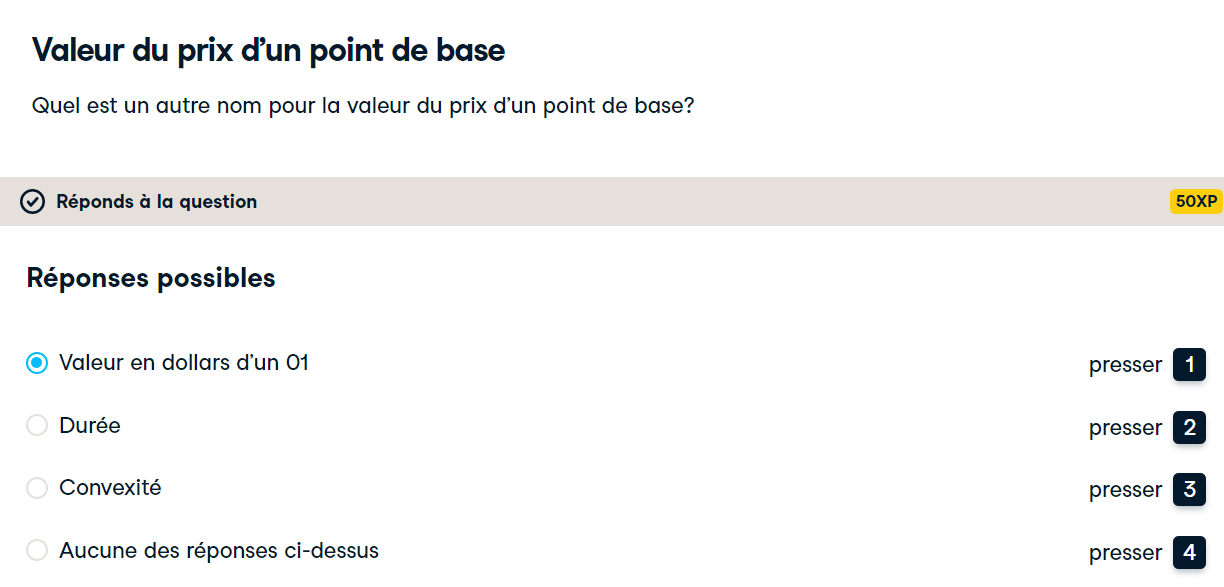

***C’est juste! Vous pouvez également vous référer à un point de base comme un 01, car il représente 0,01%. Vous rencontrerez parfois la phrase .PV01***

####**Calculer PV01 d'une obligation à 10 %**

+ ***Vous pouvez calculer le PV01 en calculant la valeur d'une obligation et la valeur de la même obligation avec une variation de rendement d'un point de base. Dans cet exercice, vous calculerez la PV01 d'une obligation d'une valeur nominale de 100 $, d'un coupon de 10 % et d'une échéance de 20 ans en supposant un rendement de 10 % jusqu'à l'échéance.***

+ *Utilisez la fonction bondprc() que vous avez créée au chapitre un pour évaluer les deux obligations. Cette fonction a été préchargée dans votre espace de travail. Assurez-vous que le résultat est un nombre positif.*

####**Instructions**

+ Calculez PV01 en utilisant la formule que vous avez vue dans la vidéo. 
+ N'oubliez pas que PV01 équivaut à la valeur d'une obligation moins la valeur de l'autre obligation. 
+ Pour calculer cela, vous devez utiliser deux appels à bondprc().
+ Pour obtenir la bonne réponse, vous devez soustraire le lien avec le YTM de 10,00 % du lien avec le YTM de 10,01 %.
+ N'oubliez pas également de prendre l'abs() de cette formule pour vous assurer que votre sortie est positive.

In [31]:
# Calculate the PV01
PV01 <- abs(bondprc(100, 0.10, 20, 0.1001) - bondprc(100, 0.10, 20, 0.10))
PV01

[1] 0.08507756

***Bien joué! Vous avez maintenant calculé la valeur actuelle d’un point de base pour cette obligation.***

###**Durée**

####**1. Durée**
+ ***Nous parlons maintenant de la duration des obligations.***

####**2. Qu’est-ce que la durée?**

+ **La duration est la variation de prix estimée pour une variation de rendement de 100 points de base.** 

+ **On s’attend donc à ce que les prix de deux obligations de même durée évoluent de la même manière.** 

+ Pourquoi est-ce utile? Par exemple, supposons que vous ayez émis une obligation d’une durée de 10. 

+ Nous savons que les obligations sont des passifs. 

+ Donc, si les rendements baissent, la valeur de l’obligation augmente et la valeur de votre passif augmente également. 

+ Pour vous protéger contre le passif croissant, vous pouvez vous assurer que vos actifs ont également une durée de 10. 

+ De cette façon, la valeur de cet actif augmente du même montant que votre passif lorsque les rendements baissent. 

+ Cette pratique est appelée gestion de l’écart de durée.

####**3. Calcul de la durée**

+ Alors, comment calculons-nous la durée? 

+ Le calcul de la durée complète est assez compliqué et dépasse le cadre de ce cours. 

+ Si vous êtes curieux, je vous recommande de consulter le chapitre Revenu fixe de mon livre pour voir comment mettre en œuvre ce calcul. 

+ Pour l’instant, nous pouvons utiliser une formule alternative souvent utilisée dans la pratique appelée « Durée approximative ». 

+ Dans cette formule, le numérateur est le prix de l’obligation lorsque le rendement baisse moins son prix lorsque le rendement augmente. 

+ Le dénominateur est le double du prix courant multiplié par la variation du rendement.

####**4. Estimation de la variation de prix**
+ La duration nous permet d’estimer la variation du prix de l’obligation en fonction d’une variation de rendement. 

+ En particulier, nous pouvons maintenant calculer à la fois la variation en pourcentage et la variation en dollars du prix. 

+ La formule de variation en pourcentage a un signe négatif à l’avant pour refléter la relation inverse entre le rendement et le prix. 

+ Ensuite, vous multipliez cela par la durée et le changement de rendement. 

+ De même, la variation en dollars est simplement la variation estimée en pourcentage multipliée par le prix actuel de l’obligation.

####**5. Comment utilisez-vous ces formules?**
+ Pour utiliser la formule de la duration, considérez une obligation d’une valeur nominale de 100 $, d’un coupon de 5 %, d’une échéance de 10 ans et d’un rendement initial de 4 %. 

+ Le prix de l’obligation est le premier intrant nécessaire. 

+ En outre, nous avons besoin du prix des obligations lorsque les rendements augmentent de 1 % et du prix des obligations lorsque les rendements baissent de 1 % en tant qu’intrants.

####**6. Comment utilisez-vous ces formules?**
+ La formule de duration nous donne que si les rendements augmentent de 1%, la duration est égale à 7,89 En utilisant la formule de variation en pourcentage, nous constatons qu’une AUGMENTATION de 1% du rendement entraînerait une BAISSE de 7,89% du prix. 

+ Le changement en dollars est alors égal à la variation en pourcentage de NÉGATIF 7,89% multipliée par le prix actuel de l’obligation de 108,11 $. 

+ Il en résulte une baisse de prix de 8,53 $.

####**7. Durée dans un graphique**
+ Ce graphique montre comment fonctionne la durée. 

+ La ligne noire sur le graphique représente le prix de l’obligation à différents niveaux de rendement. 

+ Cette obligation a un coupon de 10% avec une échéance de 20 ans. 

+ La ligne rouge est le prix estimé basé sur la durée, que nous calculons en utilisant le rendement actuel de 10% et le prix actuel de 100 $. Le point vert. 

+ Comme nous pouvons le voir, la duration est une bonne estimation du prix lorsque le changement de rendement est faible. 

+ Mais, plus la variation de rendement est importante, plus l’estimation utilisant la duration sera mauvaise. 

+ Heureusement, nous pouvons augmenter cette estimation pour l’améliorer. Nous le faisons en ajoutant la mesure de convexité, ce que nous ferons dans la prochaine vidéo.

####**8. Entraînons-nous!**
+ Pour l’instant, mettons en pratique ce que vous avez appris sur la durée.

###**EXERCICES**

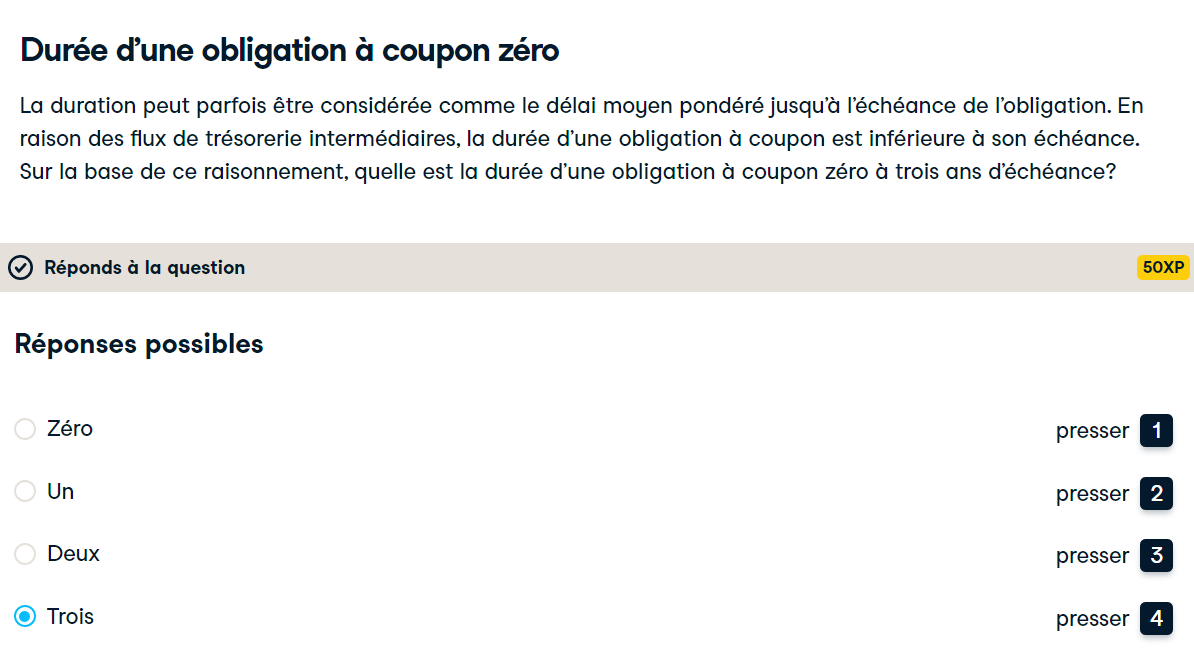

***Exactement! Sans coupon à ajuster, la durée serait égale à l’échéance normale (dans ce cas, trois).***

####**Calculer la durée approximative d'une obligation**

+ ***Une approximation utile de la formule de durée est appelée la durée approximative, qui est donnée par:***

  $$(P(down) - P(up)) / (2 * P * \Delta y)$$

+ ***où***
  + $P$ :  est le prix de l'obligation,
  + $P(down)$ :  est le prix de l'obligation si le rendement diminue,
  + $P(up)$:  est le prix de l'obligation si le rendement augmente, et
  + $\Delta y$: est la variation attendue du rendement.

+ *La formule de durée totale est plus complexe. Si vous êtes intéressé, vous pouvez vous référer au chapitre "Fixed Income" de mon livre comme référence pour cette formule.*

+ *Dans cet exercice, vous calculerez la durée approximative d'une obligation avec une valeur nominale de 100 $, un taux de coupon de 10 %, 20 ans jusqu'à l'échéance, 10 % de rendement jusqu'à l'échéance et une variation de rendement prévue de 1 %. Pour effectuer ce calcul, utilisez votre fonction bondprc() familière, qui a été préchargée dans l'espace de travail.*

####**Instructions**

+ Utilisez bondprc() pour calculer le prix de l'obligation aujourd'hui avec un rendement de 10 %. 
+ Enregistrez ceci dans px, puis affichez px.
+ Utilisez un autre appel à bondprc() pour calculer le prix de l'obligation (px_up) si le rendement augmente de 1 %.
+ Utilisez un troisième appel à bondprc() pour calculer le prix de l'obligation (px_down) si le rendement diminue de 1 %.
+ Utilisez vos trois objets (px, px_up, px_down) pour calculer la durée approximative en supposant une variation de 1 % des rendements.

In [32]:
# Calculate bond price today
px <- bondprc(p = 100, r = 0.1, ttm = 20, y = 0.1)
px

[1] 100

In [33]:
# Calculate bond price if yields increase by 1%
px_up <- bondprc(p = 100, r = 0.1, ttm = 20, y = 0.11)
px_up

[1] 92.03667

In [34]:
# Calculate bond price if yields decrease by 1%
px_down <- bondprc(p = 100, r = 0.1, ttm = 20, y = 0.09)
px_down

[1] 109.1285

In [35]:
# Calculate approximate duration
duration <- (px_down - px_up) / (2 * px * 0.01)
duration

[1] 8.545937

***Bon travail! Cette formule fournit un moyen simple d'estimer la durée sans entrer dans le détail de la formule de durée complète.***

####**Estimation de l'effet sur le prix des obligations en utilisant la durée**

+ ***Lorsque nous connaissons la durée d'une obligation, nous pouvons arriver à une estimation du prix de l'obligation en supposant une certaine variation attendue du rendement.***

+ **Dans cet exercice, supposons que les rendements devraient diminuer de 1 %, quelle est la variation en pourcentage estimée du prix et la variation en dollars du prix en raison de la durée. L'objet px, qui indique le prix de cette obligation, est de 100 $ et la durée de l'obligation est de 8,545937. Pour calculer la variation en pourcentage à l'aide de la durée, rappelez-vous la formule :**

  $$-D * \Delta y$$ 

+ ***où***

  + $D$ est la durée et

  + $\Delta y$ est la variation du rendement.

+ *Pour calculer la variation en dollars en utilisant la durée, rappelez-vous que vous multipliez la variation en pourcentage par le prix actuel. L'objet px et l'objet duration générés dans l'exercice précédent ont été préchargés dans votre espace de travail.*

####**Instructions**

+ Estimer la variation en pourcentage (duration_pct_change) en fonction de la durée si les rendements devraient diminuer de 1 %.
+ Estimez la variation en dollars (duration_dollar_change) en fonction de duration_pct_change et px si les rendements devraient diminuer de 1 %.

In [36]:
# Estimate percentage change
duration_pct_change <- - duration * -0.01
duration_pct_change

[1] 0.08545937

In [37]:
# Estimate dollar change
duration_dollar_change <- duration_pct_change * px
duration_dollar_change

[1] 8.545937

***Bon travail! Encore une fois, la façon la plus simple de calculer certaines de ces valeurs est d'utiliser des opérations mathématiques de base dans R.***

###**Convexité**

####**1. Convexité**

+ ***Comme nous l’avons vu dans la vidéo précédente, la duration fait un mauvais travail lorsque le changement de rendement est important.***

####**2. Mesure de convexité**
+ ***En effet, la duration ne rend pas compte de la « convexité » ou de la « courbure » de la relation entre les prix des obligations et les rendements. Par conséquent, nous devons calculer un ajustement de l’estimation de la durée à l’aide de ce qu’on appelle la « mesure de la convexité ».***

####**3. Calcul de la mesure de convexité**

+ Comme pour la formule de durée complète, la formule de convexité complète est un peu trop compliquée à explorer dans ce cours. 

+ Nous utilisons donc à nouveau une alternative utilisée dans la pratique appelée **formule de « convexité approximative »**. 

+ Dans le numérateur, nous avons le prix de l’obligation lorsque les rendements baissent plus le prix de l’obligation lorsque les rendements augmentent moins 2 fois le prix actuel. 

+ Le dénominateur est alors le prix actuel de l’obligation multiplié par la variation attendue du rendement au carré.

####**4. Estimation de l’effet sur le prix**

+ Une fois que vous avez calculé la mesure de convexité, vous pouvez à nouveau estimer le pourcentage de variation de prix basé sur la convexité à 0,5 fois la mesure de convexité multipliée par la variation du rendement au carré. 

+ Comme pour la duration, la variation du prix en dollars est alors la variation en pourcentage calculée ci-dessus multipliée par le prix actuel de l’obligation. 

+ Notez que la mesure de convexité est invariante à la direction du changement de rendement parce que vous TRACEZ la variation de rendement.

####**5. Comment utilisez-vous ces formules?**
+ Comment alors calcule-t-on l’effet de la convexité ? 
+ Nous pouvons continuer notre exemple à partir de la section durée. 
+ Comme vous pouvez le voir, l’application de la formule de convexité à notre exemple donne une convexité de 77,57.

####**6. Comment utilisez-vous ces formules?**
+ Avec cette valeur à l’esprit, nous pouvons alors calculer un pourcentage de changement, qui est égal à 0,38%. 
+ Cela équivaut à un changement en dollars de 42 cents.

####**7. Effet de la durée et de la convexité**
+ Nous rassemblons donc maintenant les effets de la durée et de la convexité. 
+ Rappelez-vous que dans notre exemple, la variation du dollar de durée est NÉGATIVE de 8,53 $. 


####**8. Effet de la durée et de la convexité**

+ + L’ajustement de la mesure de convexité ajoute 42 cents supplémentaires au mélange, ce qui donne un effet total de NÉGATIF 8,11 $. 

+ Rappelez-vous que le prix actuel de l’obligation était de 108,11 $, 

  + donc le prix estimé si les rendements augmentent de 1% est de 100 $. 
  
+ Maintenant, comment savons-nous que c’est une bonne estimation? 

+ Eh bien, une propriété des prix des obligations est que si le taux du coupon est égal au rendement, le prix de l’obligation est égal à sa valeur nominale. 

+ Rappelons donc que notre obligation a un coupon de 5% et que le rendement initial était de 4%. 

+ Ainsi, une augmentation de 1% se traduit par un rendement de 5%. 

+ Notre obligation a un coupon de 5% et elle a maintenant un rendement de 5%, de sorte que le prix de l’obligation sera égal à sa valeur nominale de 100 $. 

+ C’est exactement l’estimation que nous obtenons de ce qui précède!

####**9. Convexité dans un graphique**
+ Avant de poursuivre, il est utile de visualiser l’effet de la convexité sur nos calculs. 

+ Nous montrons maintenant graphiquement comment la convexité améliore l’estimation du prix de l’obligation par rapport à la duration seule. 

+ Dans ce graphique, la ligne bleue est l’estimation basée sur la durée plus la convexité. 

+ Comme nous pouvons le voir, notre estimation incluant la convexité est beaucoup plus proche de la ligne noire 
  - la ligne de prix des obligations à valorisation complète 
  - MÊME pour les grandes variations de rendement. Bien qu’il puisse encore y avoir des différences, l’estimation est beaucoup plus proche.

####**10. Entraînons-nous!**
+ Maintenant, il est temps de mettre en pratique ce que vous avez appris.

###**EXERCICES**

####**Calculer la convexité approximative d'une obligation**

+ ***Rappelons à partir de la vidéo que nous pouvons améliorer l'estimation du prix de l'obligation en ajoutant un terme de convexité à l'effet de durée. Le terme de convexité explique à quel point la courbe prix/YTM est courbée pour l'obligation.***

+ ***Dans cet exercice, vous calculerez la convexité approximative d'une obligation avec une valeur nominale de 100 $, un coupon de 10 %, 20 ans jusqu'à l'échéance et 10 % de rendement jusqu'à l'échéance lorsque vous prévoyez une variation de 1 % du rendement et ajoutez cela à l'effet de durée. Rappelons que la formule de convexité approximative est***

$$(P(up) + P(down) - 2 * P) / (P * \Delta y ^ 2)$$

+ ***où***
  
  + $P$ est le prix de l'obligation,

  + $P(up)$ est le prix de l'obligation lorsque les rendements augmentent,

  + $P(down)$ est le prix de l'obligation lorsque les rendements diminuent, et

  + $\Delta y$ est la variation attendue du rendement.

+ *Les objets px, px_up et px_down de l'exercice précédent sont préchargés dans votre espace de travail*.

####**Instructions**

+ Calculez la convexité approximative en incorporant les objets px, px_up et px_down dans la formule indiquée ci-dessus. 
+ Vous devrez également saisir une valeur appropriée pour dy.

In [38]:
# Calculate approximate convexity
convexity <- (px_up + px_down - 2 * px) / (px * (0.01)^2)
convexity

[1] 116.5218

***Bon travail! Comme vous l'avez vu dans la vidéo, la mesure de la convexité améliorera considérablement votre estimation globale du prix des obligations. Vous vous exercerez dans le prochain exercice.***

####**Estimation de l'effet de la convexité sur le prix des obligations**

+ ***Maintenant que vous avez calculé la convexité de votre obligation, vous pouvez estimer l'effet de la convexité sur le prix de l'obligation.***

+ ***Plus précisément, rappelez-vous de la vidéo que le pourcentage de variation basé sur la convexité est donné par***

$$0.5 * convexity * (\Delta y)^2$$

+ ***où***
  + $\Delta y$ est la variation attendue du rendement. La variation du dollar basée sur la convexité est égale à la variation en pourcentage multipliée par le prix actuel $P$
.

+ *Pour cet exercice, supposons que les rendements devraient baisser de 1 %.*

+ *L'objet de convexité, que vous avez calculé dans l'exercice précédent comme 116,521, et l'objet px, qui est le prix de l'obligation de 100 $, ont été préchargés dans votre espace de travail.*

####**Instructions**

+ Estimer la variation en pourcentage (convexity_pct_change) en fonction de la convexité si les rendements diminuent de 1 %.
+ Estimer la variation du dollar (convexity_dollar_change) en fonction de la convexité si les rendements diminuent de 1 %.

In [39]:
# Estimate percentage change
convexity_pct_change <- 0.5 * convexity * (0.01)^2
convexity_pct_change

[1] 0.005826088

In [40]:
# Estimate dollar change
convexity_dollar_change <- convexity_pct_change * px
convexity_dollar_change

[1] 0.5826088

***Excellent travail! Bien que la variation du dollar due à la convexité dans ce cas soit relativement faible, il est important de contrôler votre estimation globale.***

####**Estimation du prix des obligations à l'aide de la durée et de la convexité**
+ ***Dans un exercice précédent, vous avez calculé la variation du dollar due à la durée de 8,5459 et à la convexité de 0,5826. Vous avez stocké ces deux valeurs dans duration_dollar_change et convexity_dollar_change, respectivement.***

+ ***Rappelons que le prix de l'obligation est de 100 $, qui est stocké dans l'objet px. Dans cet exercice, il vous sera demandé de calculer la variation estimée du prix en fonction de la durée et de la convexité et de calculer le nouveau prix estimé de l'obligation lorsque les rendements diminuent de 1 %.***

+ *Supposons que vous sachiez que la durée de l'obligation entraîne un effet prix de 8,5459, que nous stockerons dans l'objet duration_dollar_change. Supposons que nous sachions également que la convexité de l'obligation entraîne un effet prix de 0,5826, que nous stockerons dans l'objet convexity_dollar_change. Dans cet exercice, vous ajouterez les effets de durée et de convexité pour arriver au prix estimé de l'obligation.*

####**Instructions**

+ Estimer le changement de prix (price_change) en raison de la durée et de la convexité. 
+ Pour ce faire, combinez duration_dollar_change avec convexity_dollar_change.
+ Estimation du prix en fonction de la durée et de la convexité. 
+ Cette formule doit avoir des similitudes avec votre formule pour price_change, mais doit incorporer le prix actuel de l'obligation (px).

In [41]:
# Estimate change in price
price_change <- duration_dollar_change + convexity_dollar_change

In [42]:
price_change

[1] 9.128546

In [43]:
# Estimate price
price <- px + duration_dollar_change + convexity_dollar_change

In [44]:
price

[1] 109.1285

***Excellent travail! Vous avez maintenant écrit du code pour calculer de nombreuses qualités importantes de la valeur des obligations, y compris des sujets avancés pour ajuster la valeur en fonction de la durée et de la convexité. Dans le chapitre suivant, vous mettrez en pratique ces compétences dans une dernière étude de cas complète.***

###**Résumer les principaux enseignements**

####**1. Résumer les principaux enseignements**

+ ***Vous êtes presque à la fin. Vous avez beaucoup appris sur les principes fondamentaux de l’évaluation et de l’analyse des obligations. Prenons une seconde pour passer en revue.***

####**2. Évaluation des obligations**

+ Tout d’abord, vous avez appris à évaluer une obligation. 

+ De nombreuses obligations ne sont pas négociées et, même si elles ont été négociées, elles ne se négocient pas assez fréquemment pour que nous puissions compter sur le prix de nombreuses obligations comme indicateur de leur valeur. 

+ Nous devons donc recourir à l’évaluation des obligations en utilisant des méthodes d’évaluation fondamentales. 

+ Dans ce cours, nous avons utilisé un exemple simple d’obligation afin de nous concentrer sur les concepts fondamentaux de l’évaluation des obligations. 

+ Il s’agit d’une obligation qui paie des coupons annuels à un taux de coupon fixe avec une échéance fixe et sans options intégrées. 

+ Bien sûr, vous devez vous rappeler que les liens dans le monde réel sont hétérogènes. 

+ Une même société peut émettre de nombreuses obligations avec des caractéristiques différentes. 

+ Par conséquent, à l’avenir, pour évaluer correctement une obligation, vous devez comprendre comment chacune de ces caractéristiques affecte la valeur d’une obligation.

####**3. Rendement à l’échéance**
+ La deuxième chose que vous avez apprise dans ce cours est le rendement à l’échéance de l’obligation. 

+ Le YTM peut être considéré comme la compensation des risques auxquels l’investisseur obligataire est confronté lorsqu’il investit dans cette obligation. 

+ Vous pouvez trouver le YTM d’une obligation en regardant le YTM d’obligations comparables. 

+ Alternativement, comme vous l’avez appris, vous pouvez également trouver le YTM impliqué par les investisseurs en le résolvant à l’aide de la fonction ytm() que vous avez créée. 

+ Vous avez également appris que les rendements obligataires sont composés d’un rendement sans risque et d’un écart. 

+ Le rendement sans risque est le rendement d’un titre comparable du Trésor américain. 

+ L’écart reflète de nombreux risques, tels que le risque de crédit, le risque d’inflation, le risque d’appel et le risque de liquidité. 

+ Les investisseurs doivent être rémunérés pour chaque risque qu’ils prennent lorsqu’ils investissent dans une obligation. 

+ Plus l’obligation est risquée pour l’investisseur, plus le rendement exigé par l’investisseur est élevé.

####**4. Entraînons-nous!**
+ Vous allez maintenant passer par une série d’exercices pour solidifier vos connaissances de l’évaluation des obligations et du rendement à l’échéance. 

+ Vous évaluerez une obligation notée Aaa d’une valeur nominale de 100 $, d’un taux de coupon de 3 % et d’une échéance de 8 ans. 

+ Vous devrez trouver le rendement d’obligations comparables notées Aaa et évaluer l’obligation étape par étape.

###**EXERCICES**

####**Trouvez les rendements des obligations AAA au 30 septembre 2016**

+ ***Dans cet exemple complet, vous évaluerez une obligation avec une valeur nominale de 100 $, un taux de coupon de 3 % et une échéance de 8 ans. Cette obligation a été notée Aaa par Moody's et a été émise le 30 septembre 2016. Vous avez déterminé que le rendement de cette obligation est comparable au rendement des obligations notées Aaa.***

+ *Dans cet exercice, utilisez la commande Quandl() (du package Quandl) pour obtenir le rendement de l'indice Aaa de Moody au 30 septembre 2016 et stockez cette valeur dans un objet nommé aaa_yield.*

####**Instructions**

+ Utilisez library() pour charger le package Quandl().
+ Utilisez la commande Quandl() pour obtenir les données de rendement de l'indice AAA de Moody ("FED/RIMLPAAAR_N_M"). 
+ Enregistrez ceci dans aaa.
+ Utilisez subset() sur aaa pour conserver uniquement le rendement du 30 septembre 2016. 
+ Enregistrez-le dans aaa_yield.
+ Convertissez aaa_yield en décimales en utilisant un appel à as.numeric() et en divisant par 100.

In [45]:
# Load Quandl package
library(Quandl)

# Obtain Moody's Aaa yield
aaa <- Quandl("FED/RIMLPAAAR_N_M")

# identify yield on September 30, 2016
aaa_yield <- subset(aaa, aaa$Date == "2016-09-30")

# Convert yield into decimals
aaa_yield <- as.numeric(aaa_yield$Value)/100
aaa_yield

[1] 0.0341

***Excellent travail! Évaluer le rendement en le comparant à d'autres taux obligataires est simple à l'aide du package Quandl. Dans le prochain exercice, ce rendement servira de base pour déterminer la valeur des flux de trésorerie.***

####**Valorisation des obligations**

+ ***Au chapitre un, vous avez évalué une obligation en utilisant une approche étape par étape. Dans cet exercice, vous évaluerez une obligation d'une valeur nominale de 100 $, d'un taux de coupon de 3 % et d'une échéance de 8 ans. Vous disposerez les flux de trésorerie de l'obligation et calculerez la valeur actuelle de chacun de ces flux de trésorerie en utilisant le rendement Aaa que vous avez obtenu lors de l'exercice précédent.***

+ *L'objet aaa_yield est préchargé dans votre espace de travail.*

####**Instructions**

+ Créez un objet flux de trésorerie (cf) contenant les flux de trésorerie de l'obligation.

+ Utilisez data.frame() pour convertir cf en une trame de données afin de pouvoir ajouter des variables supplémentaires nécessaires à votre analyse.


+ Ajoutez un indicateur de temps (cf$t) représentant les années de 1 à 8 à l'aide de la commande seq().


+ Calculez 

  + le facteur PV (cf$pv_factor) en fonction du rendement Moody's Aaa (aaa_yield) et 
  
  + de votre indicateur de temps (cf$t).

+ Calculez 

  + la valeur actuelle de chaque flux de trésorerie (cf$pv) 
  
  + comme le produit de cf$cf et 
  
  + du facteur PV (cf$pv_factor).


+ Enfin, calculez le prix de l'obligation comme la somme() de la valeur actuelle de chaque flux de trésorerie.

In [46]:
# Layout the bond's cash flows
cf <- c(3, 3, 3, 3, 3, 3, 3, 103)

# Convert to data.frame
cf <- data.frame(cf)

# Add time indicator
cf$t <- seq(from = 1, to = 8, by = 1)

# Calculate PV factor
cf$pv_factor <- 1 / (1 + aaa_yield)^cf$t

# Calculate PV
cf$pv <- cf$cf * cf$pv_factor

# Price bond
sum(cf$pv)

[1] 97.17106

In [47]:
print(cf)

   cf t pv_factor        pv
1   3 1 0.9670245  2.901073
2   3 2 0.9351363  2.805409
3   3 3 0.9042997  2.712899
4   3 4 0.8744799  2.623440
5   3 5 0.8456435  2.536930
6   3 6 0.8177579  2.453274
7   3 7 0.7907919  2.372376
8 103 8 0.7647152 78.765661


***Excellent travail! Bien que complexe, la maîtrise de cette série de calculs est essentielle pour comprendre comment les prix des obligations sont déterminés en l'absence de transactions généralisées.***

####**Code vectoriel de flux de trésorerie alternatif**

+ ***Dans l'exemple ci-dessus, vous avez peut-être codé le vecteur de flux de trésorerie en écrivant:*** 

  + cf <- c(3, 3, 3, 3, 3, 3, 3, 103).

+ Cependant, cela peut sembler un peu fastidieux. Une alternative consiste à coder le vecteur de flux de trésorerie à l'aide de la commande **rep()**. 
+ Taper 
  + rep($x$, $y$) répétera automatiquement $x$, $y$ fois. 
  + Par exemple, rep(1, 4) équivaut à taper c(1, 1, 1, 1).

+ *Dans cet exercice, vous allez construire une fonction plus générale pour calculer un vecteur de flux de trésorerie en fonction d'une série d'entrées : r pour le taux de coupon, p pour la valeur nominale et ttm pour la durée jusqu'à l'échéance. Pour ce faire, vous profiterez de la commande rep().*

####**Instructions**

+ Codez une fonction de flux de trésorerie alternative à l'aide de rep() et des variables d'entrée r, p et ttm. 

+ Enregistrez cette nouvelle fonction sous alt_cf.


+ Utilisez alt_cf pour générer un vecteur de flux de trésorerie avec un taux de coupon (r) de 3 % (0,03), une valeur nominale (p) de 100 $ et une durée jusqu'à l'échéance (ttm) de 8 ans.

In [48]:
# Code cash flow function
alt_cf <- function(r, p, ttm) {
  c(rep(p * r, ttm - 1), p * (1 + r))
}

# Generate cf vector
alt_cf(r = 0.03, p = 100, ttm = 8)

[1]   3   3   3   3   3   3   3 103

***Excellent! Comme vous pouvez le voir, le vecteur de flux de trésorerie produit par votre fonction alt_cf() est identique à celui que vous avez encodé manuellement dans l'exercice précédent.***

###**Durée et convexité**

####**1. Durée et convexité**
+ ***Dans le chapitre trois, vous avez appris la durée et la convexité.***

####**2. Durée et convexité**

+ ***Vous avez appris que les variations des prix des obligations sont influencées par de nombreux facteurs. Nous avons discuté de quelques-uns de ces facteurs, notamment l’ampleur de la variation du rendement, le taux de coupon et le délai d’échéance. Vous avez appris à calculer et à utiliser la duration pour estimer l’évolution des prix des obligations lorsque les taux d’intérêt changent. Vous avez également appris que la duration est une mauvaise estimation pour les changements de rendement importants et c’est pourquoi nous devons considérer la mesure de la convexité. Vous avez ensuite appris à calculer la convexité et à l’utiliser pour augmenter l’estimation du prix de l’obligation en utilisant uniquement la duration. Vous avez vu à quel point cette estimation du prix des obligations est meilleure.***

####**3. Entraînons-nous!**
+ Vous allez maintenant passer par une série d’exercices sur la durée et la convexité. 

+ Dans ces exercices, vous continuerez avec le lien que vous avez apprécié dans les exercices précédents. 

+ Vous estimerez ensuite le prix de l’obligation en utilisant la duration et la convexité en supposant une augmentation de 1% du rendement.

###**EXERCICES**

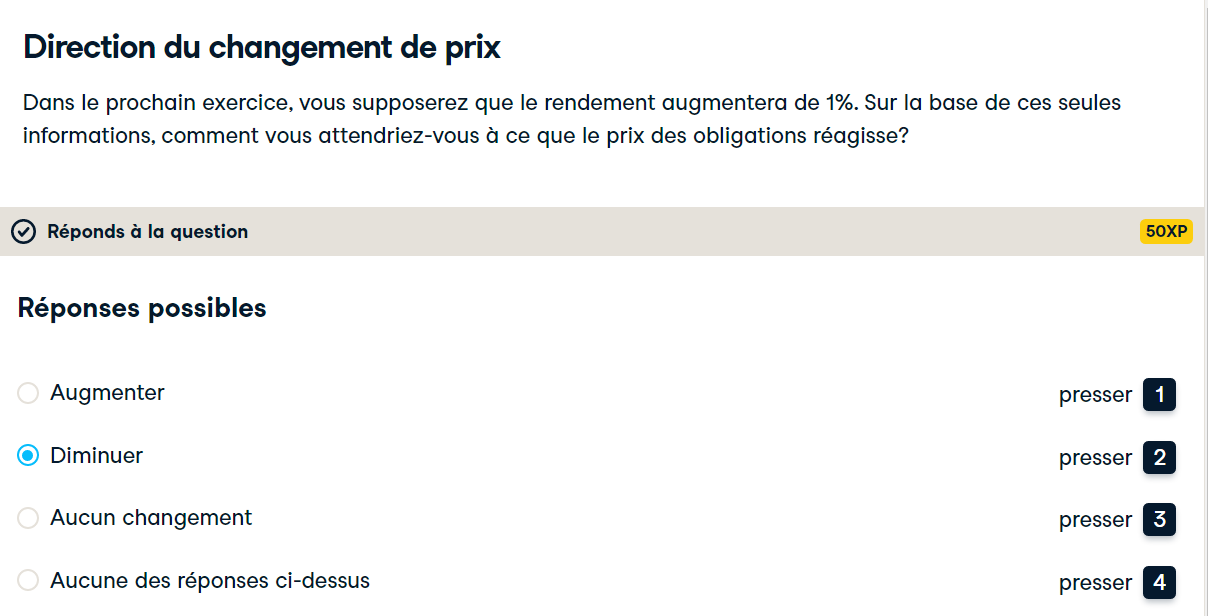

***Exactement! En raison de la relation inverse entre les prix des obligations et les variations de rendement, nous devrions nous attendre à ce que le prix diminue si le rendement augmente de 1%.***

####**Calculer la durée**

+ ***Au chapitre trois, vous avez appris à utiliser la formule de durée approximative. Pour rappel, la formule de durée approximative est la suivante :***

$$(P(down) - P(up)) / (2 * P * \Delta y)$$

+ ***où***
  + $P$ est le prix de l'obligation aujourd'hui,
  + $P(up)$ est le prix de l'obligation si les rendements augmentent,
  + $P(down)$ est le prix de l'obligation si les rendements diminuent, et
  + $\Delta y$ est la variation attendue du rendement.

+ *Dans cet exercice, vous allez calculer la durée. Plus précisément, vous utiliserez la fonction bondprc() pour calculer px_up et px_down.*

+ *Les objets px et aaa_yield des exercices précédents sont préchargés dans votre espace de travail. Pour cet exercice, supposons que la variation attendue du rendement soit une augmentation de 1 %. Comme auparavant, le taux du coupon est de 3 % (0,03) et la durée jusqu'à l'échéance de 8 ans.*

####**Instructions**

+ Utilisez bondprc() pour calculer le prix de l'obligation lorsque les rendements augmentent de 1 %. 
+ Enregistrez ceci dans px_up.
+ Utilisez bondprc() pour calculer le prix de l'obligation lorsque les rendements diminuent de 1 %. 
+ Enregistrez ceci dans px_down.
+ Utilisez px, px_up et px_down pour calculer la durée avec la formule ci-dessus.
+ Calculez et affichez l'effet en pourcentage de la durée sur le prix (duration_pct_change) en fonction de la durée.
+ Calculez et visualisez l'effet en dollars de la durée sur le prix (duration_dollar_change) en fonction de la durée.

In [49]:
# Calculate bond price when yield increases
px_up <- bondprc(p = 100, r = 0.03, ttm = 8, y = aaa_yield + 0.01)

# Calculate bond price when yield decreases
px_down <- bondprc(p = 100, r = 0.03, ttm = 8, y = aaa_yield - 0.01)

# Calculate duration
duration <- (px_down - px_up) / (2 * px * 0.01)

In [50]:
# Calculate percentage effect of duration on price
duration_pct_change <- - duration * (0.01)
duration_pct_change

[1] -0.06790577

In [51]:
# Calculate dollar effect of duration on price
duration_dollar_change <- duration_pct_change * px
duration_dollar_change

[1] -6.790577

***Excellent travail! Vous avez dérivé plusieurs valeurs importantes, y compris la durée elle-même, l'effet en pourcentage de la durée sur le prix et l'effet en dollars de la durée sur le prix, sur la base de relativement peu d'entrées.***

####**Calculer la mesure de convexité**

+ ***Rappelez-vous du chapitre trois que la durée ne s'ajuste pas de manière adéquate à la nature convexe de la relation entre le prix et le rendement. Pour améliorer l'estimation du prix des obligations en fonction de la durée, nous pouvons ajouter un terme basé sur la mesure de convexité.***

+ ***Au chapitre trois, vous avez appris que la formule approximative de la convexité est :***

$$(P(up) + P(down) - 2 * P) / (P * \Delta y^2)$$

+ ***où***

  + $P$ est le prix de l'obligation,

  + $P(up)$ est le prix de l'obligation lorsque les rendements augmentent,

  + $P(down)$ est le prix de l'obligation lorsque les rendements diminuent, et

  + $\Delta y$ est la variation attendue du rendement.

+ *Vous avez calculé les objets px, px_up et px_down précédemment et les trois objets sont disponibles dans votre espace de travail. Pour cet exercice, supposons que la variation attendue du rendement est de 1 %. Calculez la mesure de convexité, la variation en pourcentage estimée du prix due à la convexité et l'effet estimé du dollar sur le prix dû à la convexité.*

####**Instructions**

+ Utilisez la formule ci-dessus avec px, px_up et px_down pour calculer la convexité. Enregistrez ceci à la convexité.
+ Utilisez la convexité et vos connaissances sur l'évolution du rendement pour calculer et afficher l'effet en pourcentage de la convexité sur le prix (convexity_pct_change).
+ Utilisez la convexité pour calculer et afficher l'effet dollar de la convexité sur le prix (convexity_dollar_change).

In [52]:
# Calculate convexity measure
convexity <- (px_up + px_down - 2 * px) / (px * (0.01)^2)

# Calculate percentage effect of convexity on price
convexity_pct_change <-  0.5 * convexity * (0.01)^2
convexity_pct_change

[1] -0.02543915

In [53]:
# Calculate dollar effect of convexity on price
convexity_dollar_change <- convexity_pct_change * px
convexity_dollar_change

[1] -2.543915

***Bien joué! Une fois de plus, vous avez calculé une série de valeurs importantes (convexité, effet en pourcentage de la convexité et effet en dollar de la convexité) sur la base d'un petit nombre d'entrées. Dans le prochain et dernier exercice, vous combinerez ces informations avec votre estimation de durée pour déterminer le prix de votre obligation.***

####**La variation de prix estimée en utilisant la durée et la convexité**

+ ***Dans les exercices précédents, vous avez estimé que si les rendements augmentent de 1 %, vous pouvez vous attendre à un effet dollar dû à la duration de -6,790577 et un effet dollar dû à la convexité de 0,285045. Ces deux valeurs sont stockées respectivement dans les objets duration_dollar_change et convexity_dollar_change. Vous savez également que l'obligation a un prix actuel de 97,17106 $, qui est stocké dans l'espace de travail en tant qu'objet px.***

+ *Rappelez-vous du chapitre trois que des estimations de prix précises doivent tenir compte à la fois de la durée et de la convexité. Dans cet exercice, il vous sera demandé de calculer la variation estimée du prix en fonction de la durée et de la convexité. Vous calculerez ensuite le nouveau prix estimé en supposant une augmentation de 1 % des rendements.*

####**Instructions**

+ Estimez la variation totale du prix compte tenu d'une augmentation de 1 % des rendements en fonction de duration_dollar_change et convexity_dollar_change. 
+ Enregistrez cette valeur dans price_change.
+ Utilisez price_change pour calculer le new_price de votre obligation !

In [54]:
# Estimate price_change
price_change <- duration_dollar_change + convexity_dollar_change
price_change

[1] -9.334492

In [55]:
# Estimate new_price
new_price <- px + duration_dollar_change + convexity_dollar_change
new_price

[1] 90.66551

***Excellent travail! Vous avez maintenant une estimation claire et fiable du prix des obligations basée sur la durée ajustée de la convexité !***